# Process Mining : Insurance claims prediction

## Context 

### Description

- **Dataset** : https://www.kaggle.com/datasets/carlosalvite/car-insurance-claims-event-log-for-process-mining?resource=download
- This event log has been artificially generated and curated to provide a comprehensive view of car insurance claims, allowing users to discover and identify bottlenecks, automation opportunities, conformance issues, reworks, and potential fraudulent cases using any process mining software.

> **Standard Process flow:** *First Notification of Loss (FNOL) → Assign Claim → Claim Decision → Set Reserve → Payment Sent → Close Claim*

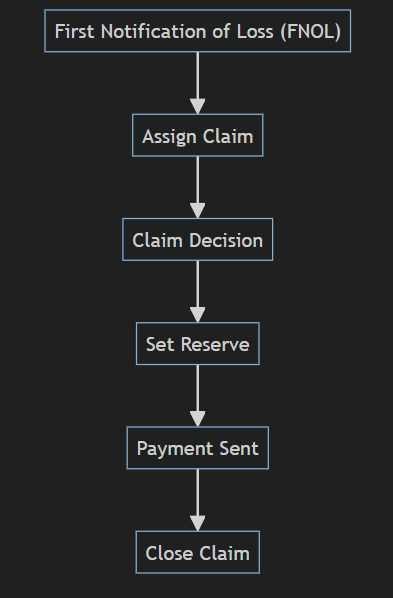

- **Problem** : the proposed approach dataset of financial transactions, It would compare the performance of the proposed approach with traditional methods of fraud detection, and demonstrate the potential benefits of early detection of fraudulent activity.

- **Process Mining Analysis** : https://academic-celonis-splpne.eu-2.celonis.cloud/package-manager/ui/studio/ui/spaces/aebbc40f-08d6-4a61-98c8-139fdddc5384/packages/1c7bb36f-f7bf-402d-93ce-7b17d5edd05d/nodes/a596af0e-ae07-44d9-96be-62cb7e679638#!/documents/a596af0e-ae07-44d9-96be-62cb7e679638/view/sheets/299b84d5-52eb-4525-93f7-544d92d6b2d0/b/6a0d1817-2b4c-4261-974d-96681dafcbd3

### General Architecture
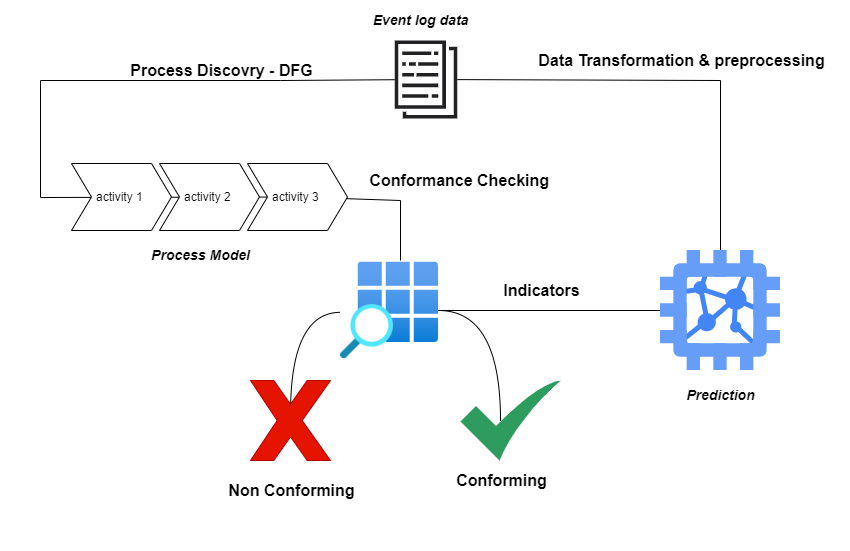
- **Start with Event Log Data:** Begin by collecting and integrating event log data, which includes detailed information about each activity in the claims process.
- **Process Discovery - DFG:** Use process discovery techniques like Directly-Follow Graphs (DFG) to visualize the actual flow of activities, creating a process model from the event logs.
- **Conformance Checking:** Compare the discovered process model with the ideal process model to identify compliant and non-compliant cases.
- **Indicator Analysis:** Analyze key indicators to better understand process performance and detect potential issues.
- **Data Transformation & Preprocessing:** Transform and preprocess the data to prepare it for analysis, ensuring it is clean and standardized.
- **Prediction:** Use machine learning models to predict the status of new cases based on the analysis of past cases and identified indicators.

### Process Mining analysis

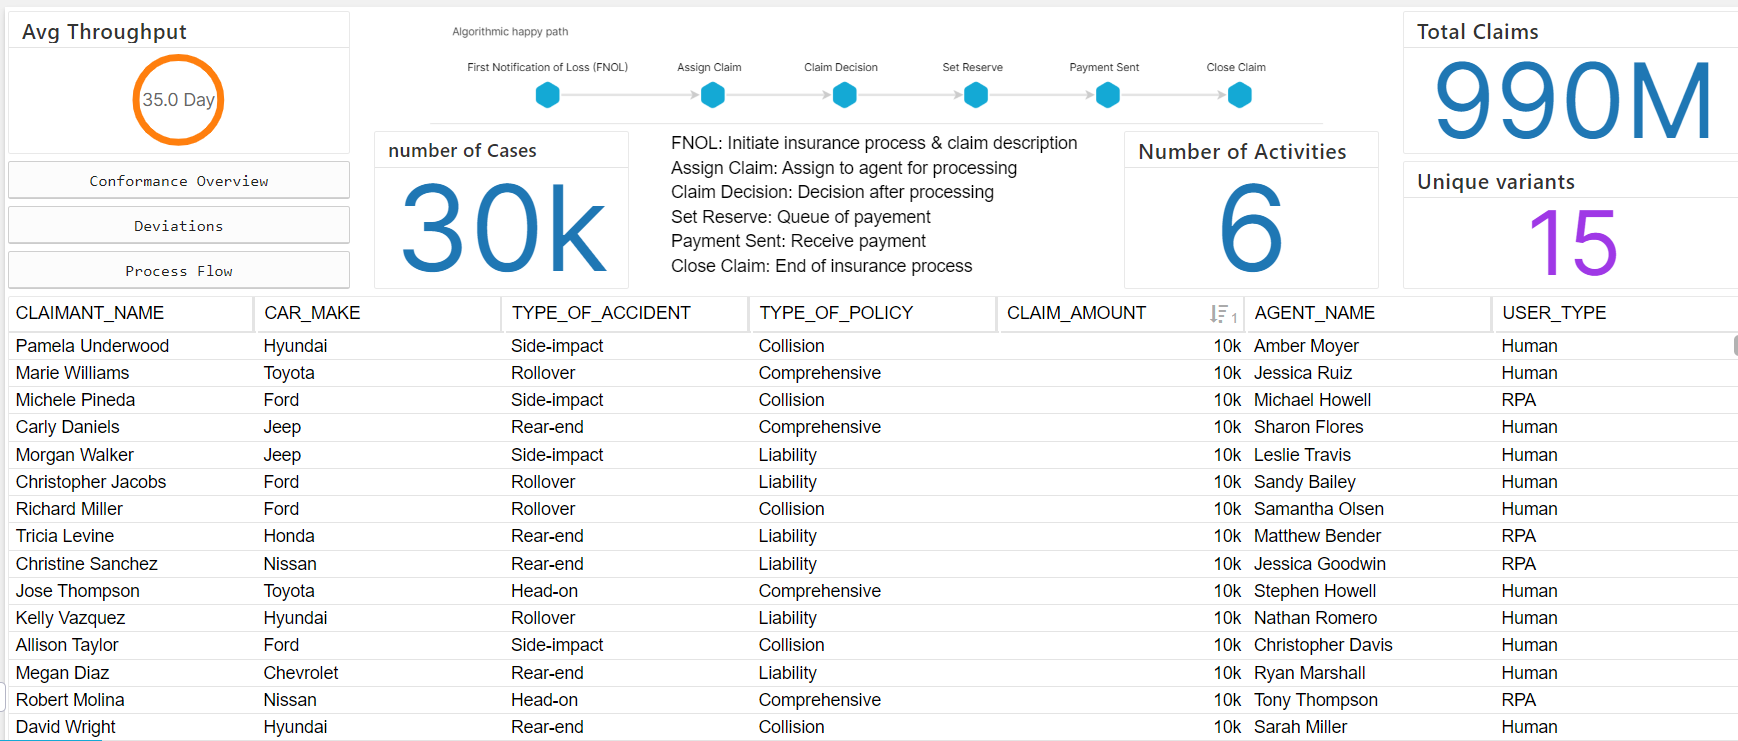
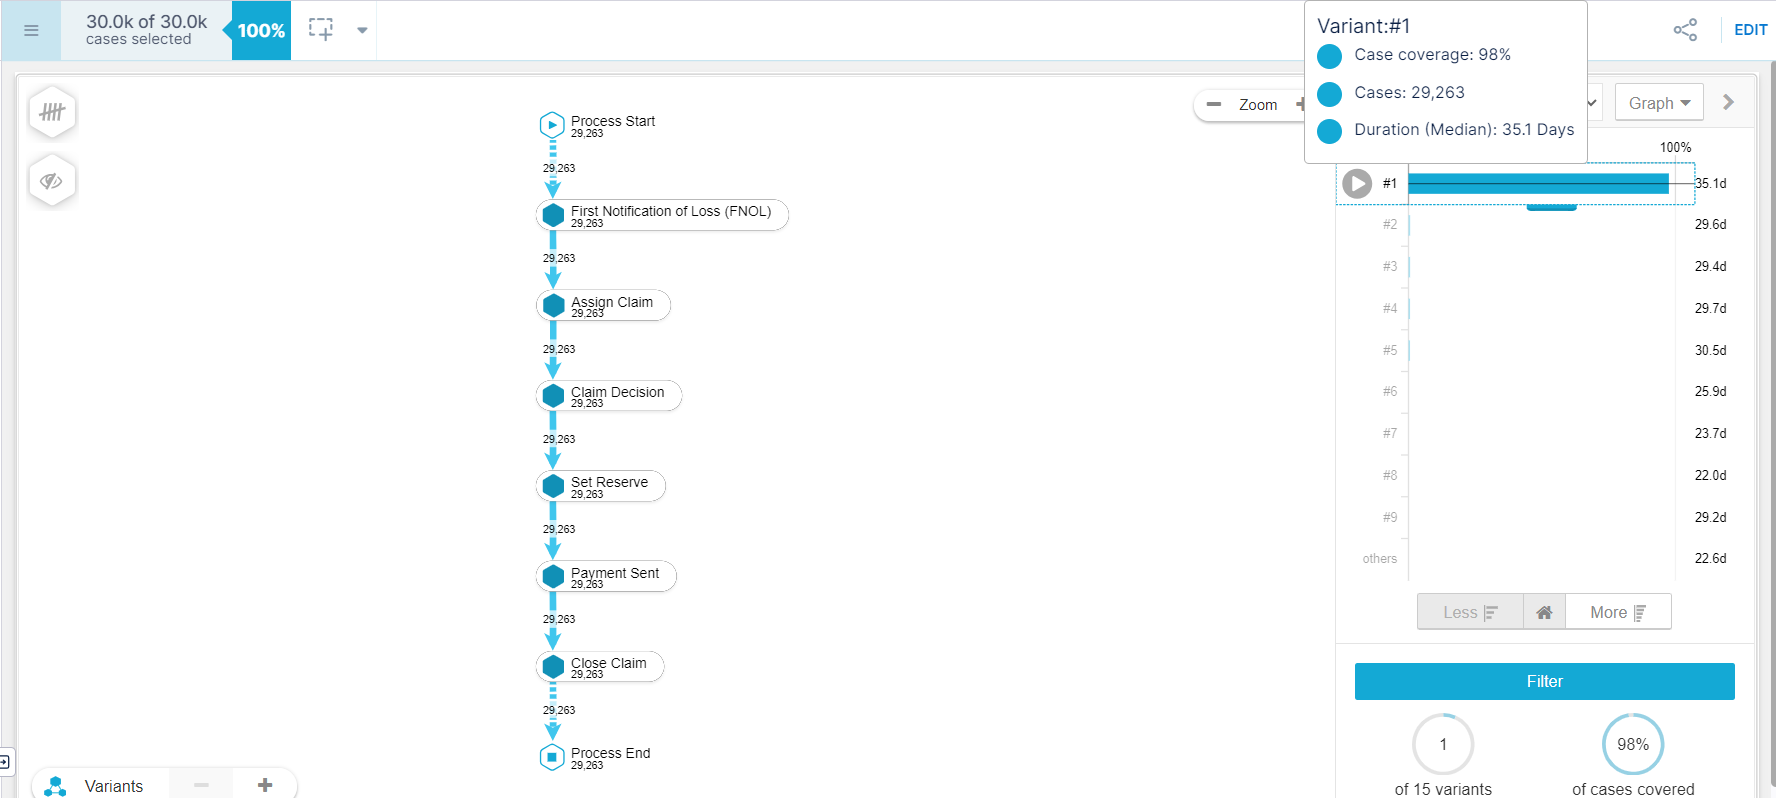
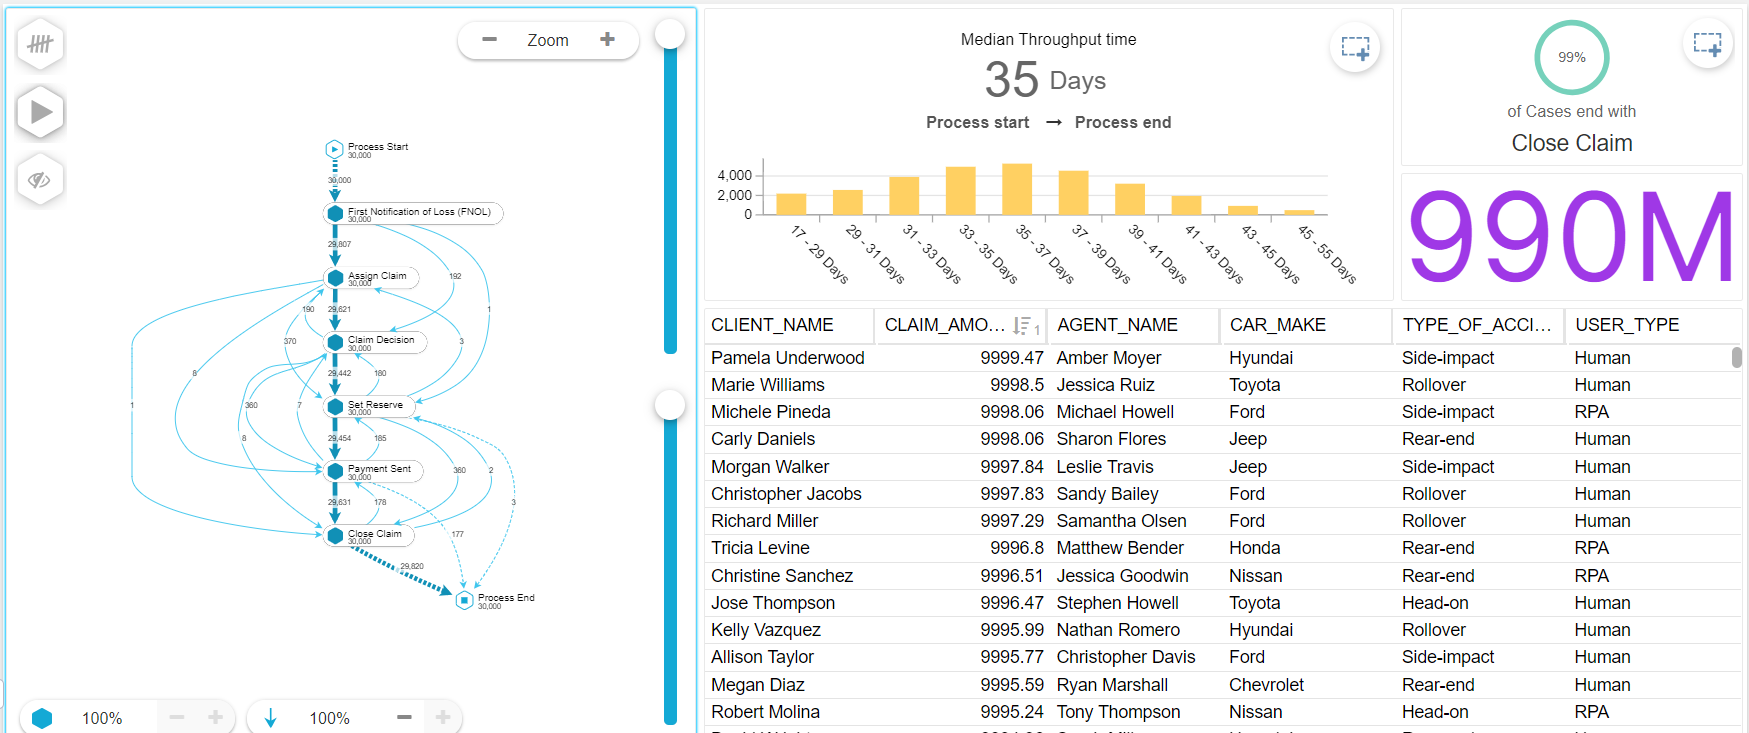
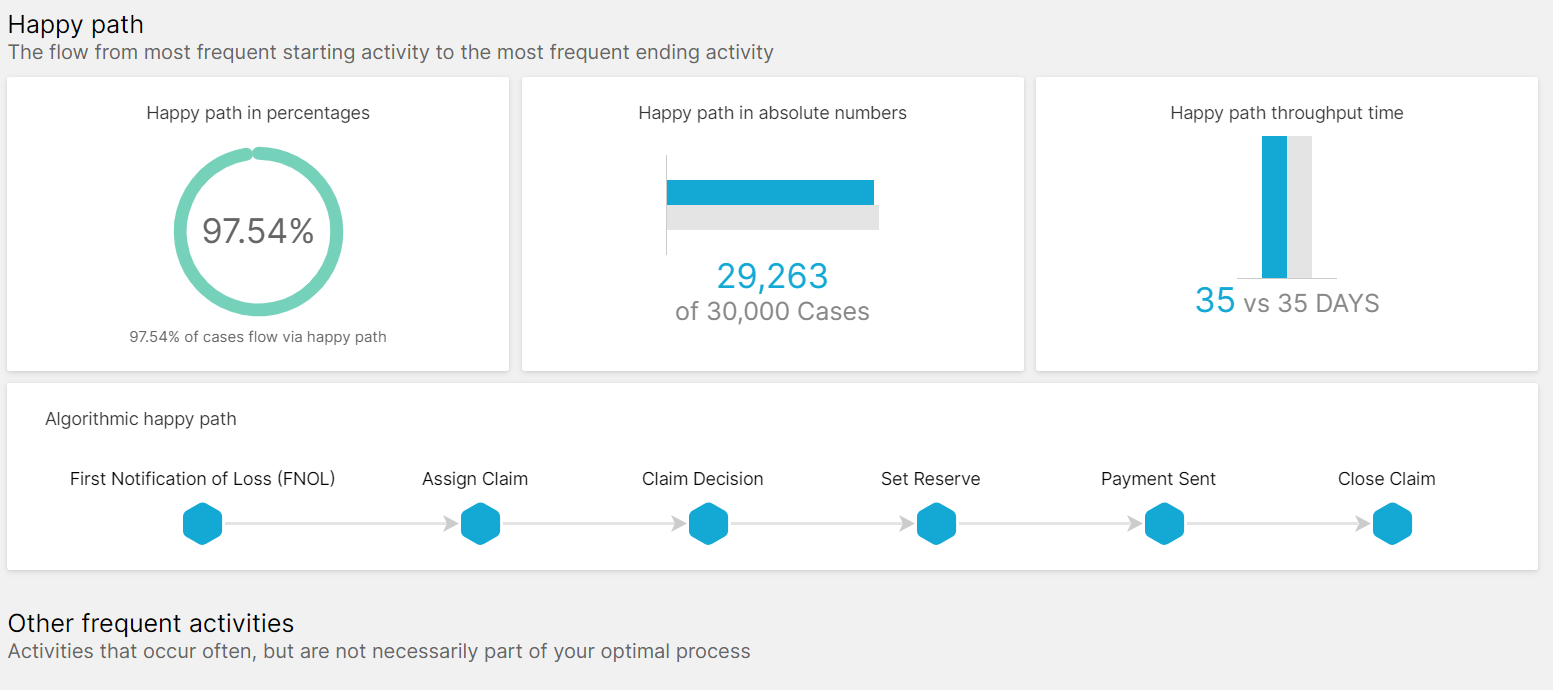
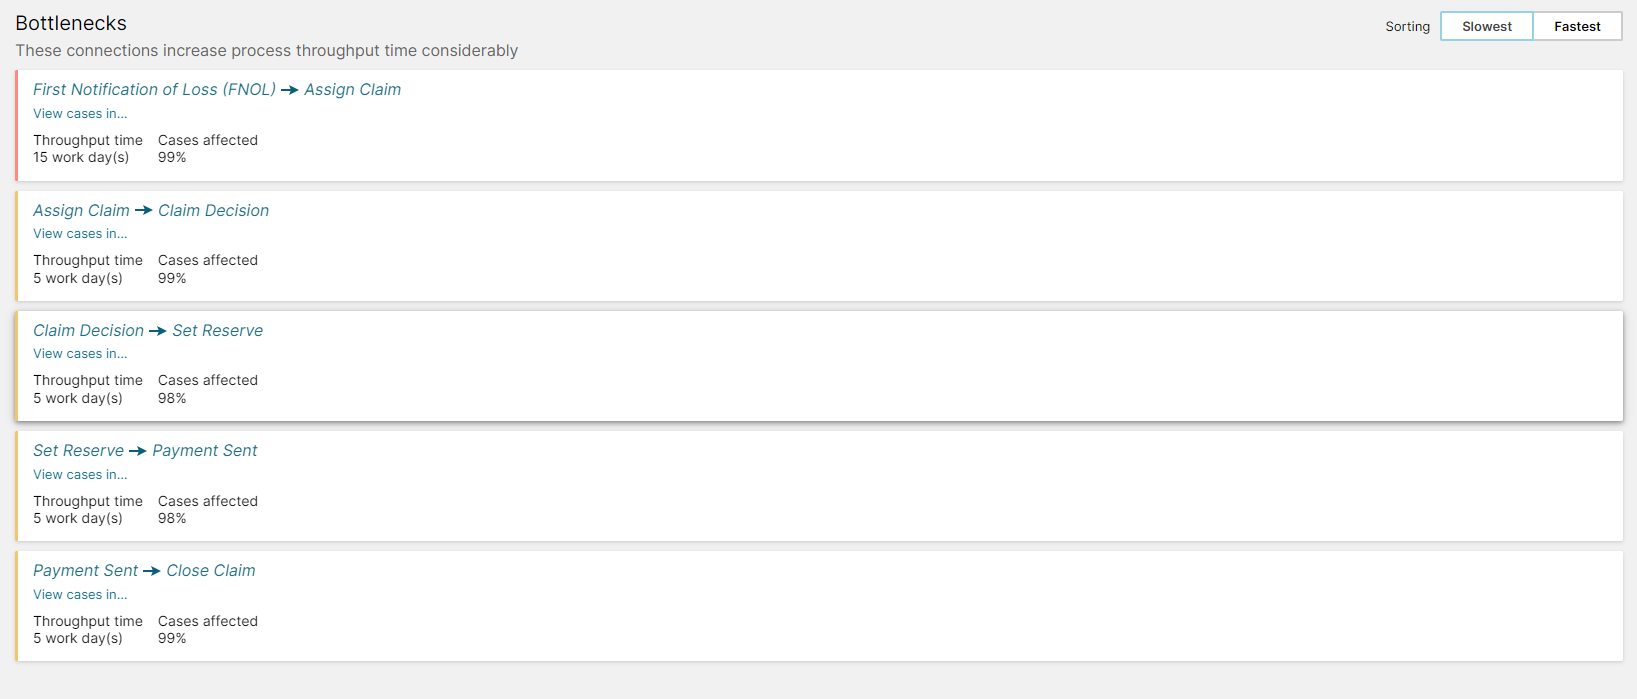
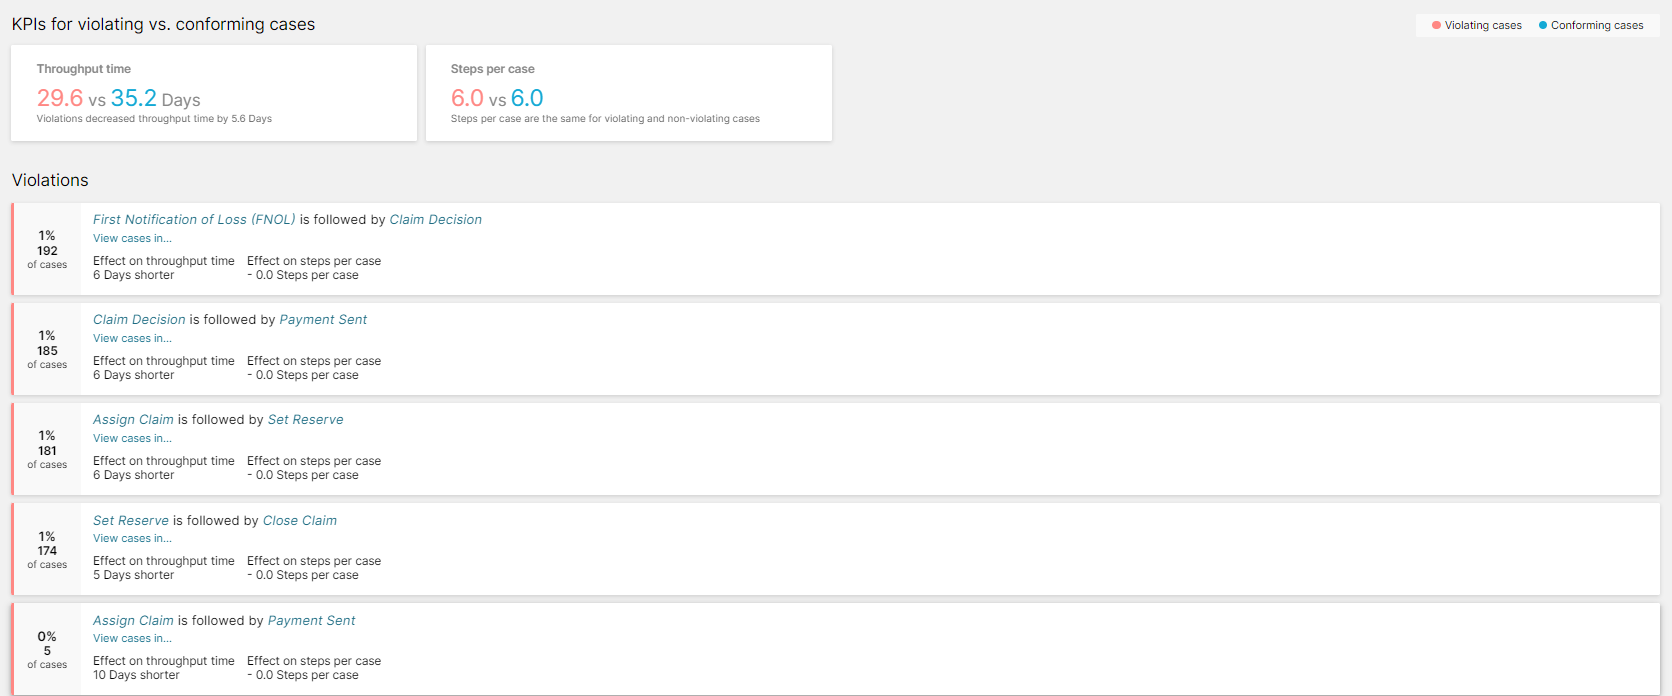
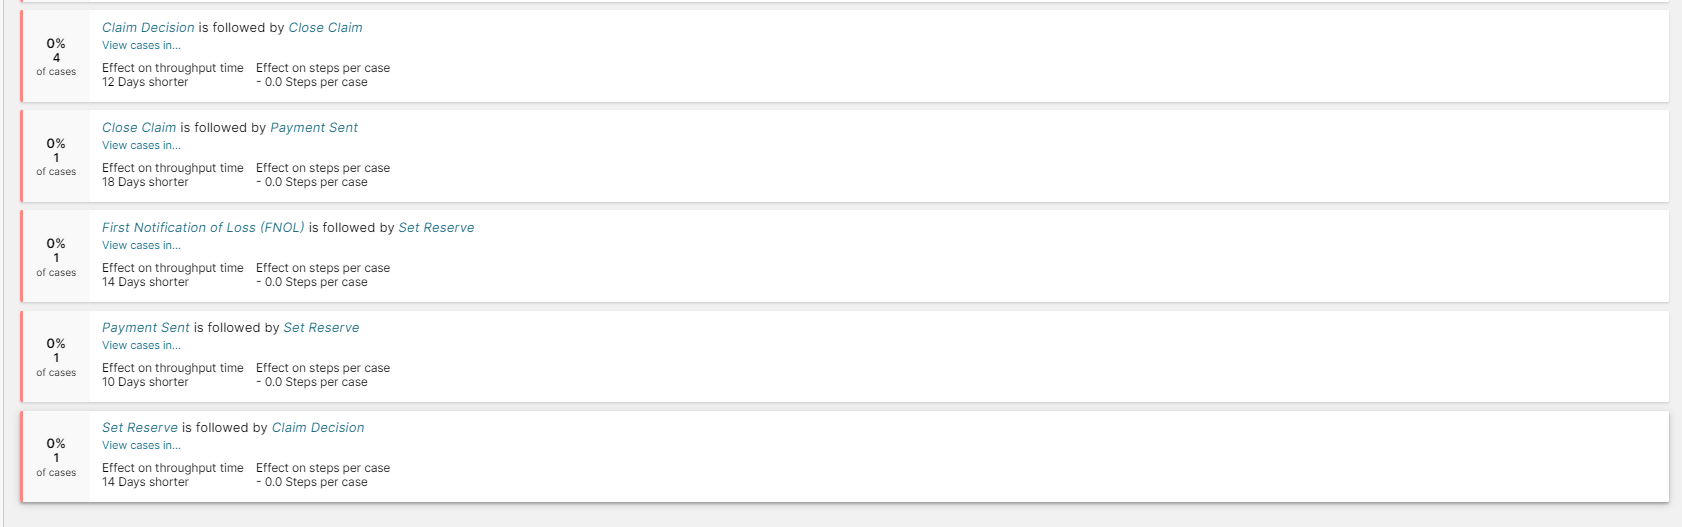

### Features

| Field Name | Description |
| --- | --- |
| case_id | Unique identifier for each insurance claim case. |
| activity_name | Name of the activity related to the claim process. |
| timestamp | Date and time when the activity occurred. |
| claimant_name | Name of the person filing the insurance claim. |
| agent_name | Name of the agent handling the claim. |
| adjuster_name | Name of the adjuster assigned to the case. |
| claim_amount | Amount of money claimed. |
| claimant_age | Age of the claimant. |
| type_of_policy | Type of insurance policy under which the claim was filed (e.g., Collision, Comprehensive). |
| car_make | Make of the car involved in the claim. |
| car_model | Model of the car involved in the claim. |
| car_year | Year of manufacture of the car involved in the claim. |
| type_of_accident | Type of accident that occurred (e.g., Rollover, Rear-End Collision). |
| user_type | Type of user initiating the claim process (e.g., RPA, human user). |

## Load & explorating data

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('dataset/Insurance_claims_ML.csv')
df.head()

,case_id,client,agent,adjuster,claim_amount,client_age,type_of_policy,car_brand,car_model,car_year,type_of_accident,user_type,total_activities,throughput_duration_days,First Notification of Loss (FNOL),Assign Claim,Claim Decision,Set Reserve,Payment Sent,Close Claim,State
0,000112d5-9d04-450f-820f-3edfc0626cf9,Kimberly Collins,Hannah Lopez,Joy Simpson,9266.19,60,Comprehensive,Hyundai,Elantra,2021,Head-on,Human,6,31,1,2,3,4,5,6,valid
1,0001c62c-696c-4251-a604-8d319fc73fac,Lisa Adkins,Kimberly Baird,Joseph Pham,4636.30,21,Comprehensive,Nissan,Altima,2012,Head-on,Human,6,30,1,2,3,4,5,6,valid
2,00048c02-65b5-423b-bf38-139a099a5624,Derek Montgomery,Patrick Downs,Samuel Holt,4897.70,44,Comprehensive,Hyundai,Elantra,2011,Rear-end,RPA,6,34,1,2,3,4,5,6,valid
3,0005b367-5a31-4bcd-82f3-05103f43b462,Jeffrey Lawson,Jessica Ruiz,Mr. Louis Nelson,9596.03,81,Collision,Jeep,Wrangler,2017,Side-impact,RPA,6,36,1,2,3,4,5,6,valid
4,000694f5-9a75-4885-ab77-7842d78188ae,Dawn Gentry,Taylor Rose,Diane Holmes,7181.00,61,Collision,Hyundai,Elantra,2017,Rollover,Human,6,25,1,2,4,3,5,6,fraud


In [21]:
df.shape

(30000, 21)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   case_id                            30000 non-null  object 
 1   client                             30000 non-null  object 
 2   agent                              30000 non-null  object 
 3   adjuster                           30000 non-null  object 
 4   claim_amount                       30000 non-null  float64
 5   client_age                         30000 non-null  int64  
 6   type_of_policy                     30000 non-null  object 
 7   car_brand                          30000 non-null  object 
 8   car_model                          30000 non-null  object 
 9   car_year                           30000 non-null  int64  
 10  type_of_accident                   30000 non-null  object 
 11  user_type                          30000 non-null  obj

In [23]:
df.nunique()

case_id                              30000
client                               25778
agent                                25862
adjuster                             25797
claim_amount                         29519
client_age                              68
type_of_policy                           3
car_brand                                7
car_model                                7
car_year                                13
type_of_accident                         4
user_type                                2
total_activities                         1
throughput_duration_days                39
First Notification of Loss (FNOL)        1
Assign Claim                             3
Claim Decision                           4
Set Reserve                              5
Payment Sent                             4
Close Claim                              3
State                                    3
dtype: int64

In [24]:
df.describe().round(0)

,claim_amount,client_age,car_year,total_activities,throughput_duration_days,First Notification of Loss (FNOL),Assign Claim,Claim Decision,Set Reserve,Payment Sent,Close Claim
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,5499.0,52.0,2016.0,6.0,35.0,1.0,2.0,3.0,4.0,5.0,6.0
std,2601.0,20.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1000.0,18.0,2010.0,6.0,16.0,1.0,2.0,2.0,2.0,3.0,4.0
25%,3242.0,34.0,2013.0,6.0,31.0,1.0,2.0,3.0,4.0,5.0,6.0
50%,5499.0,52.0,2016.0,6.0,35.0,1.0,2.0,3.0,4.0,5.0,6.0
75%,7759.0,69.0,2019.0,6.0,38.0,1.0,2.0,3.0,4.0,5.0,6.0
max,9999.0,85.0,2022.0,6.0,54.0,1.0,4.0,5.0,6.0,6.0,6.0


In [40]:
df = df.drop(columns='case_id')

## EDA

### Analysis: univariant - bivariant 

                                             |          | [  0%]   00:00 -> (? left)


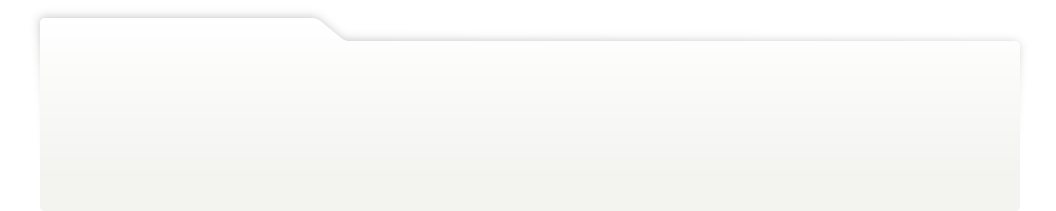
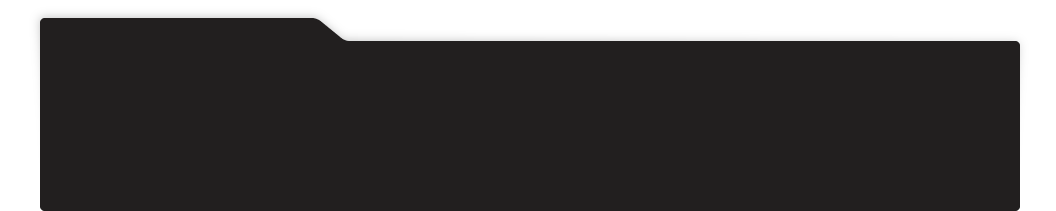
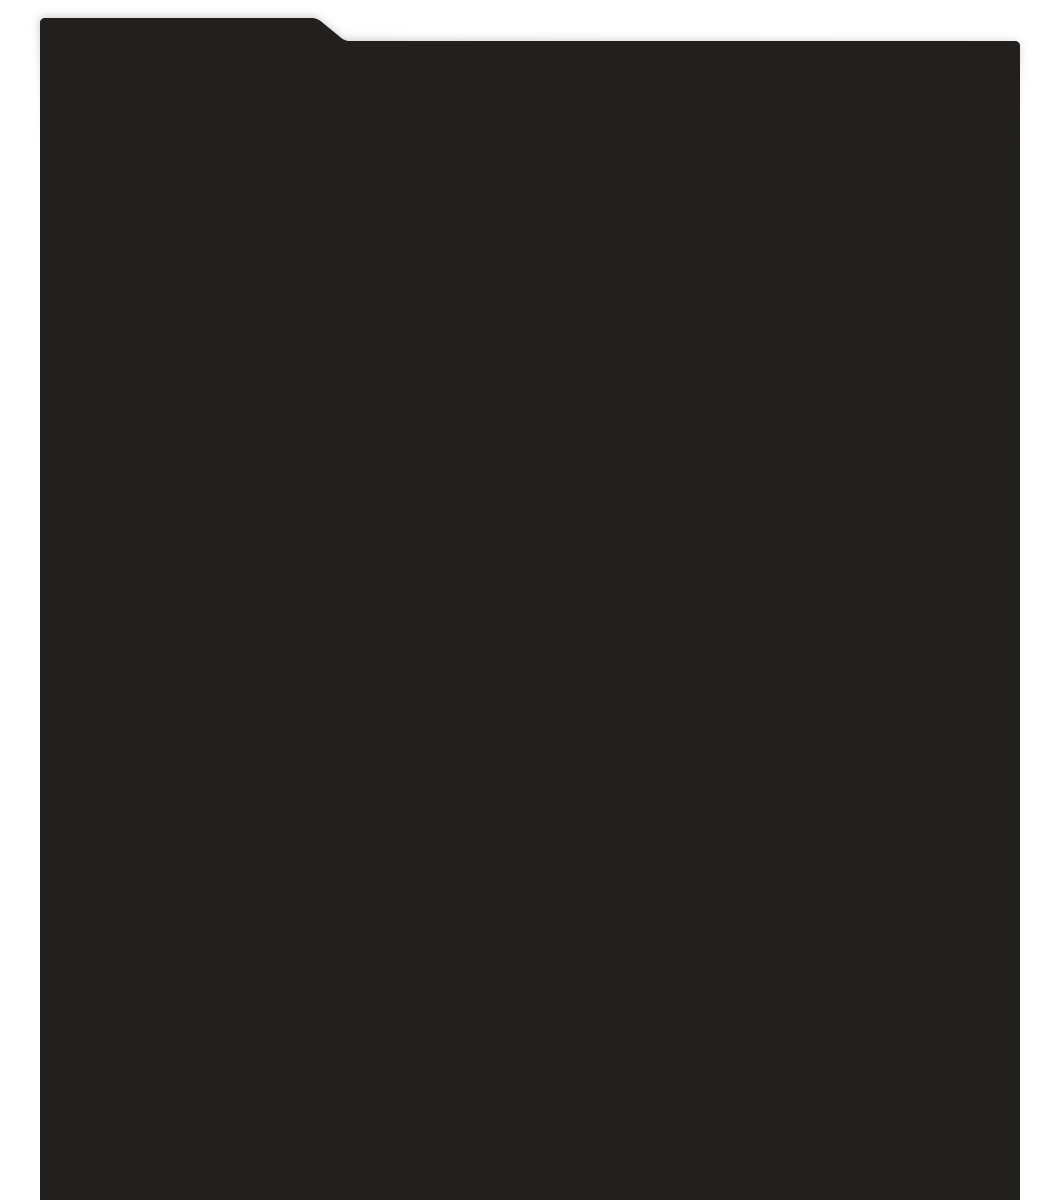
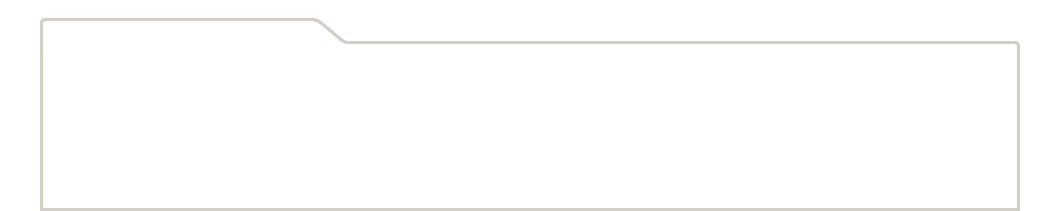
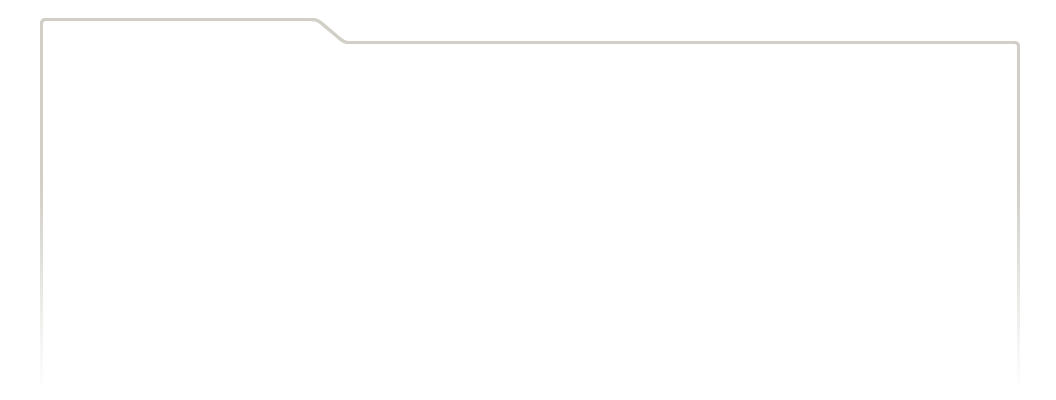
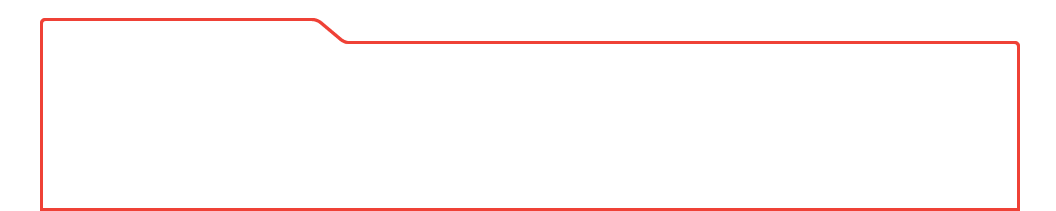
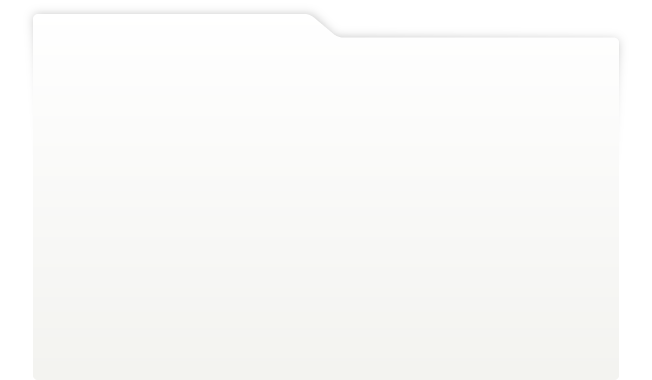
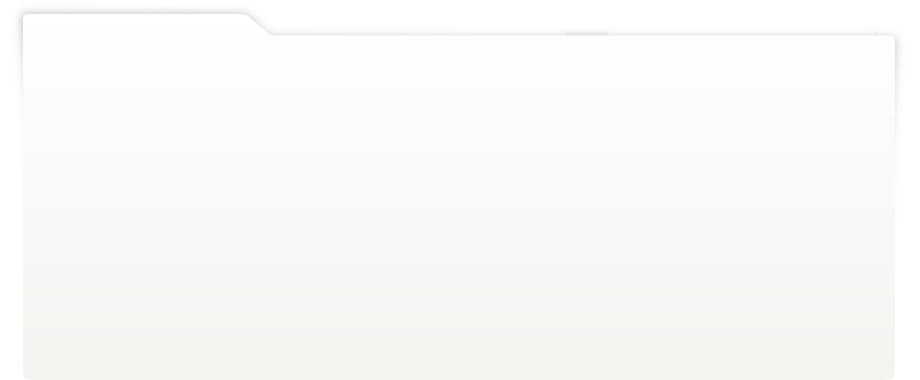
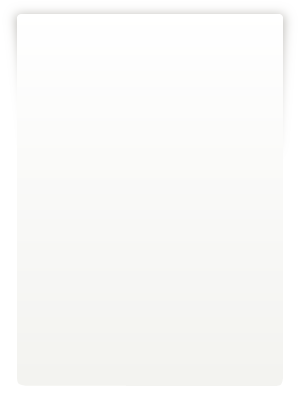
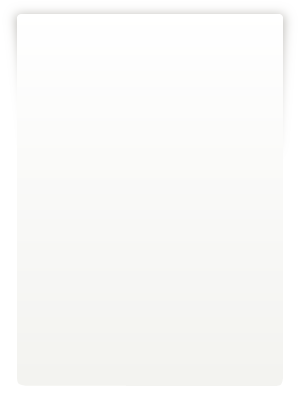
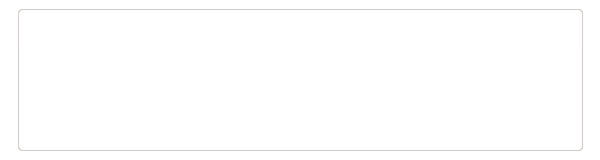
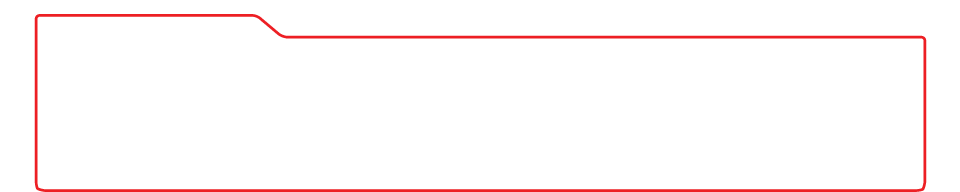
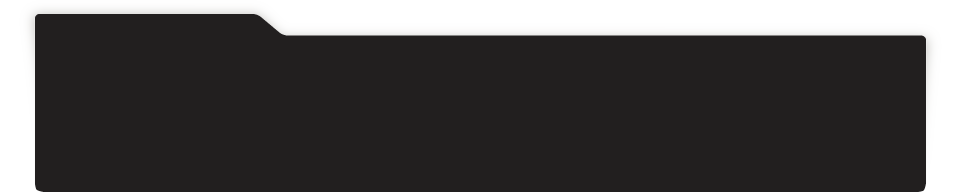
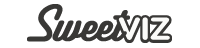
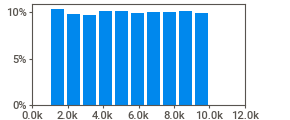
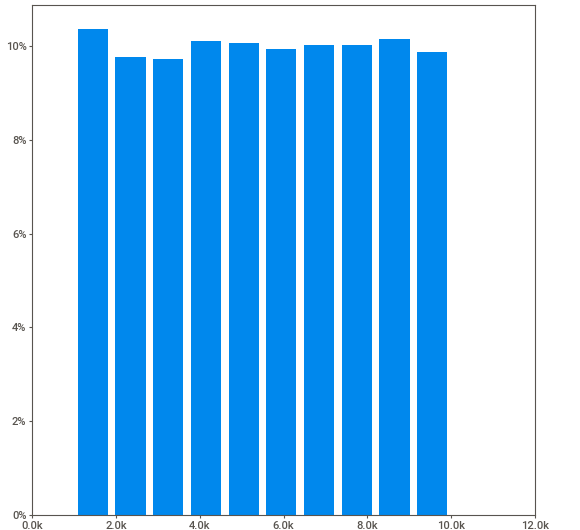
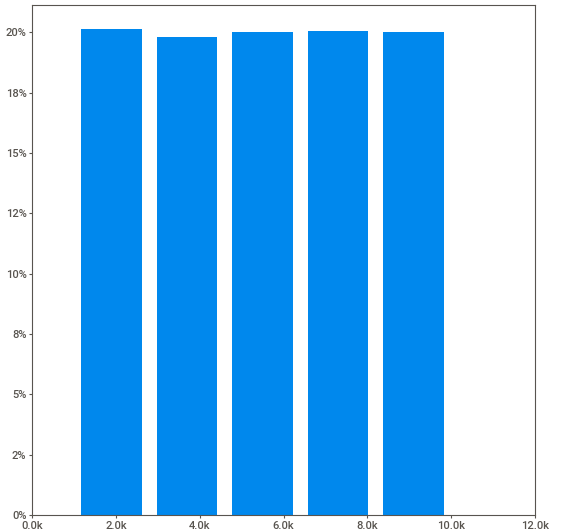
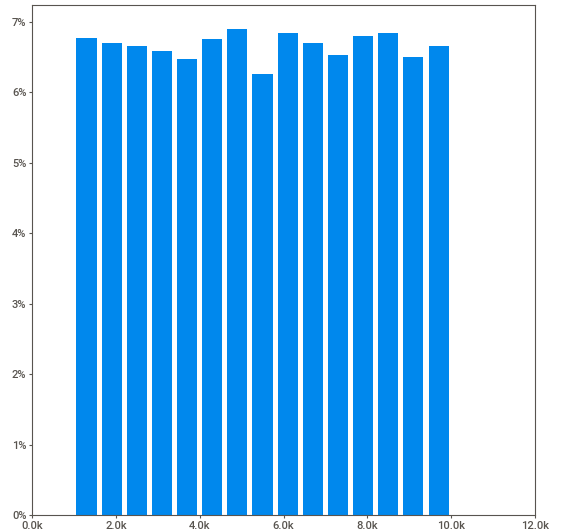
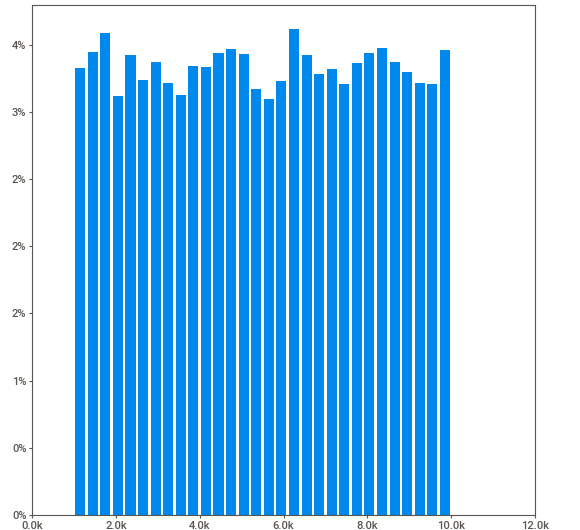
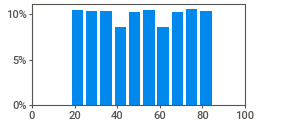
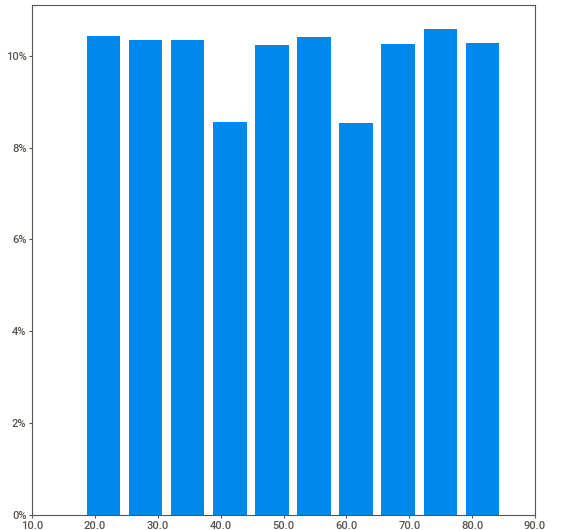
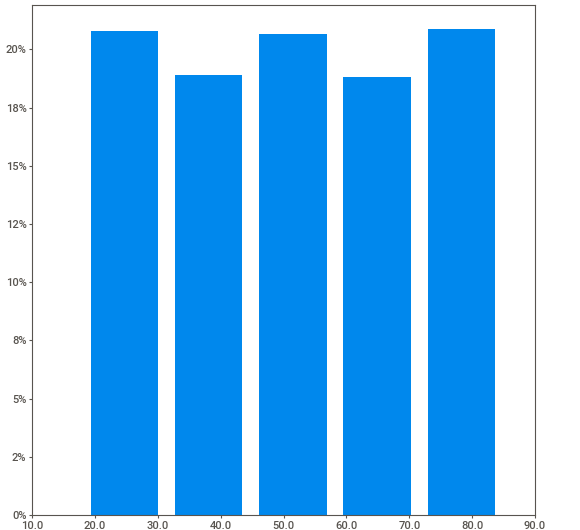
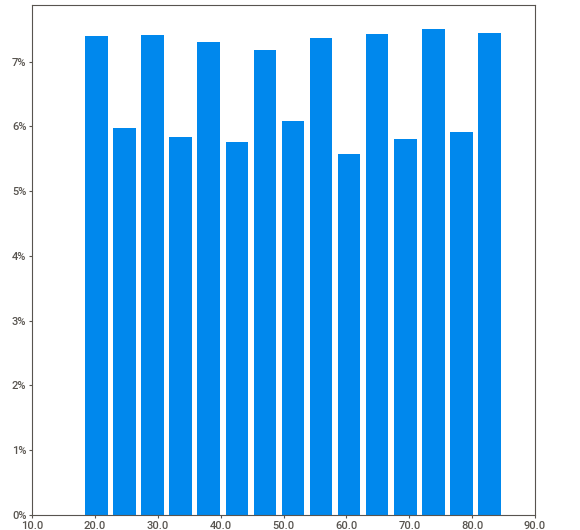
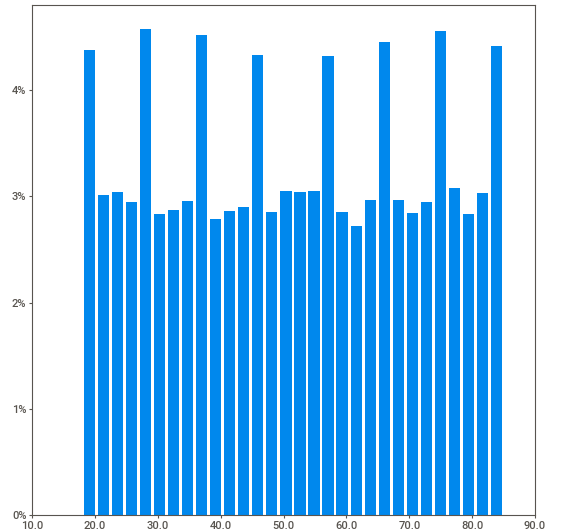
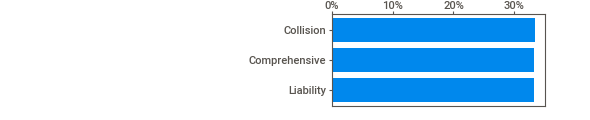
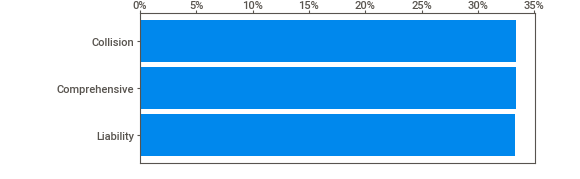
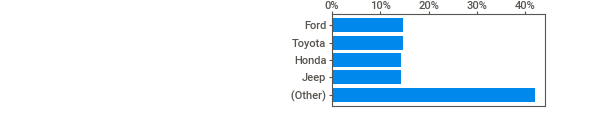
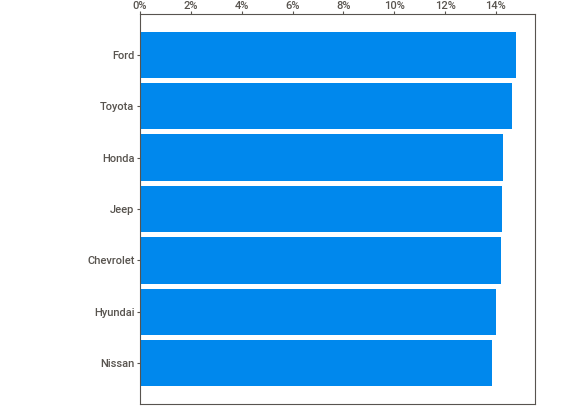
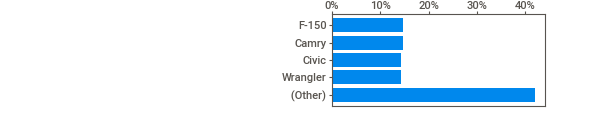
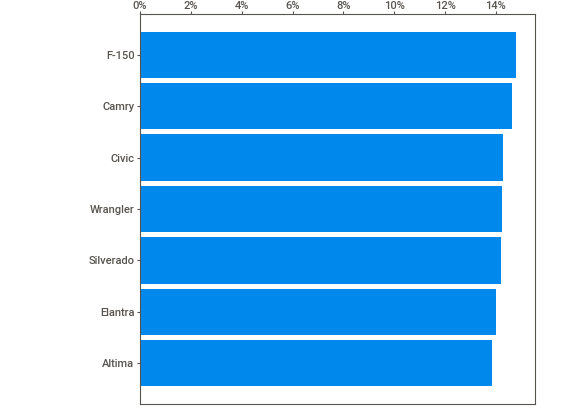
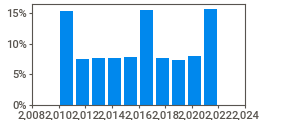
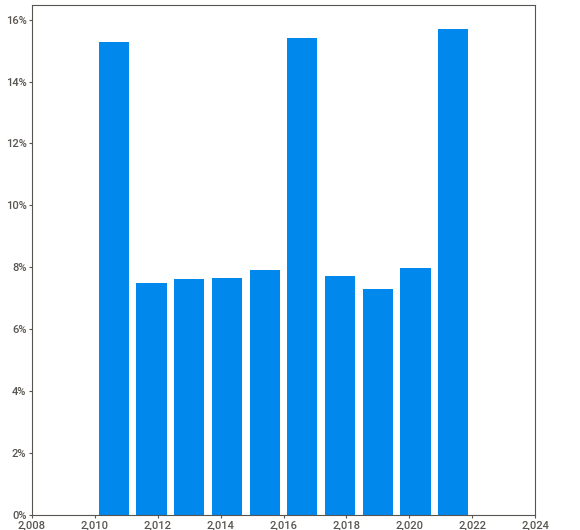
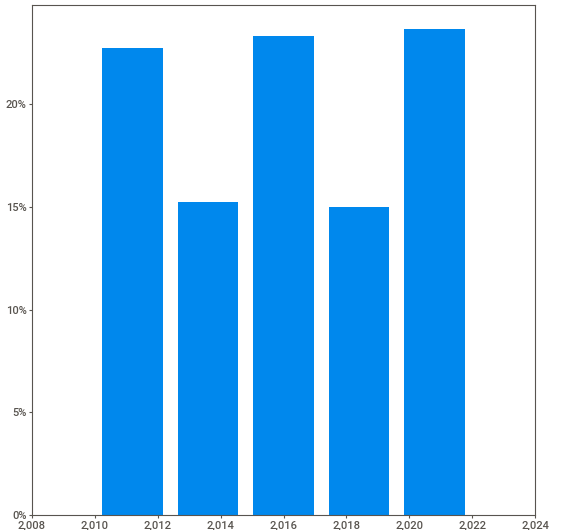
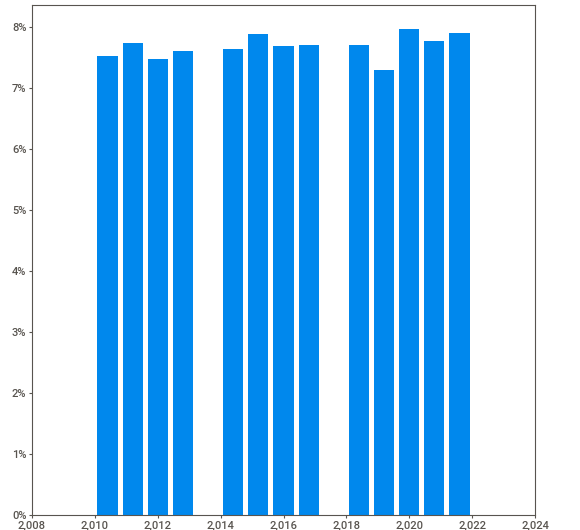
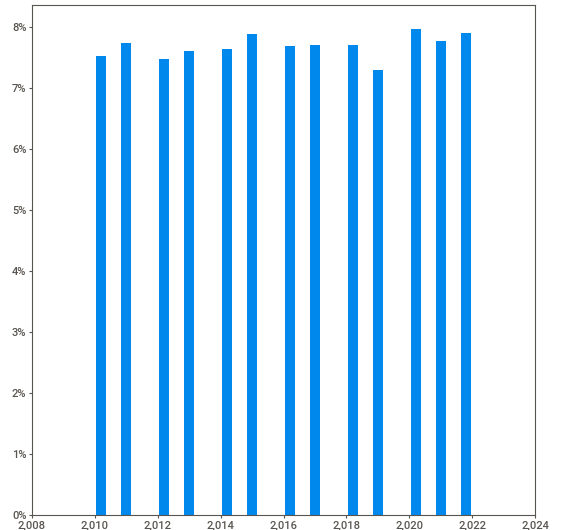
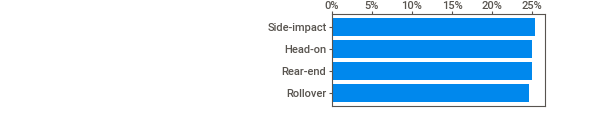
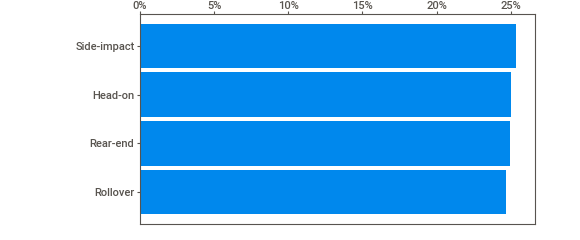
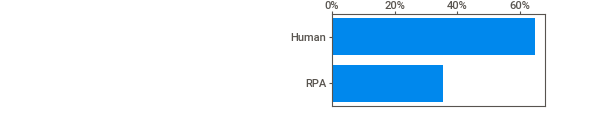
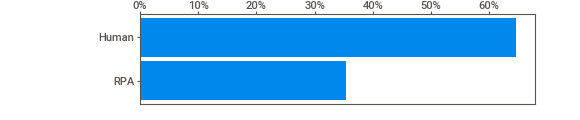
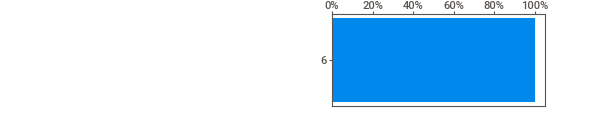
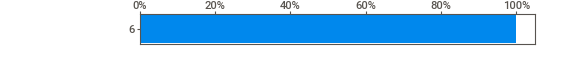
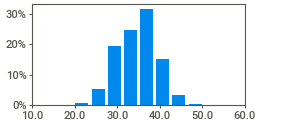
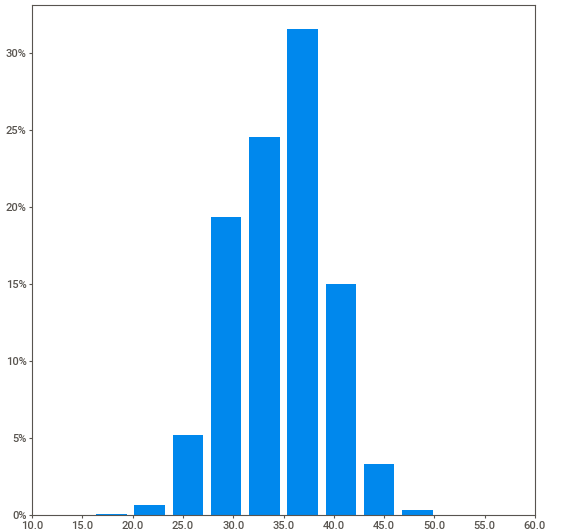
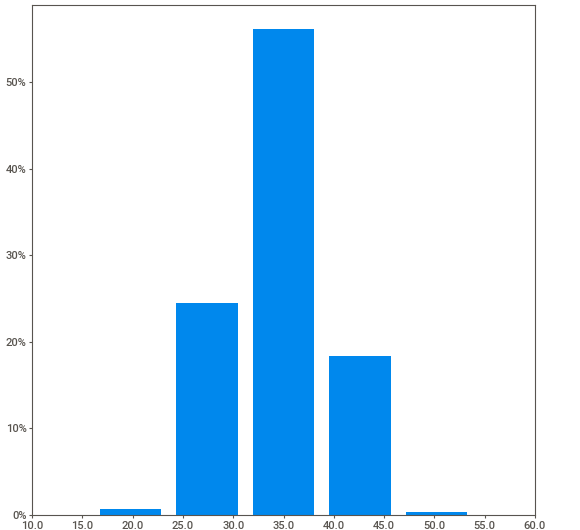
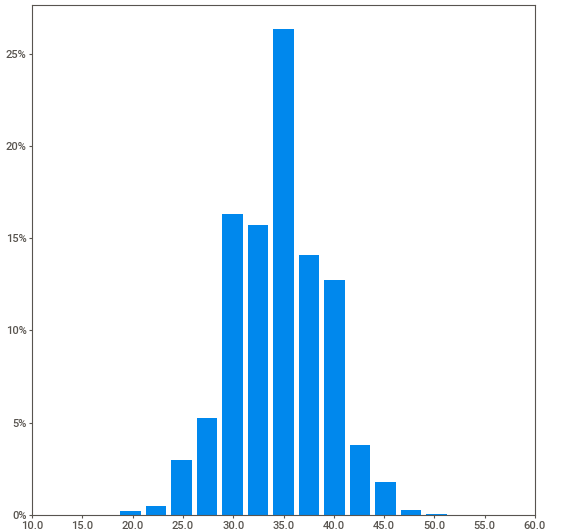
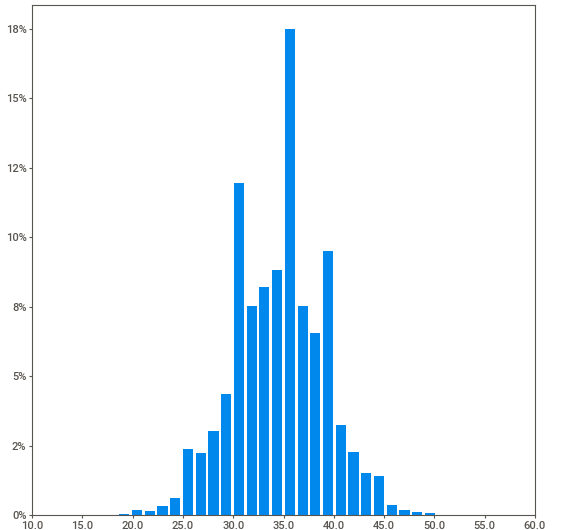
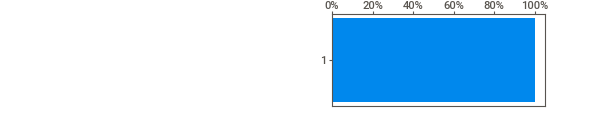
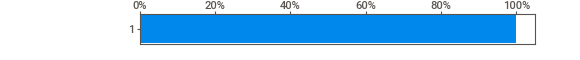
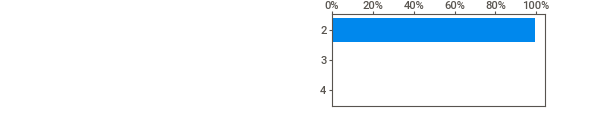
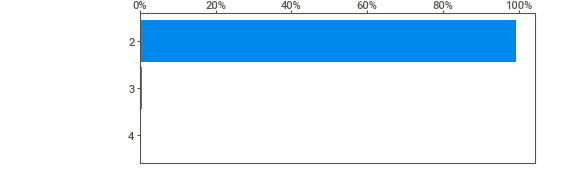
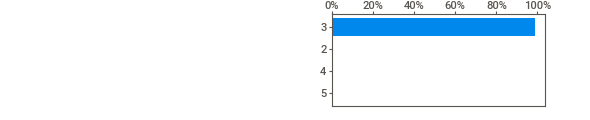
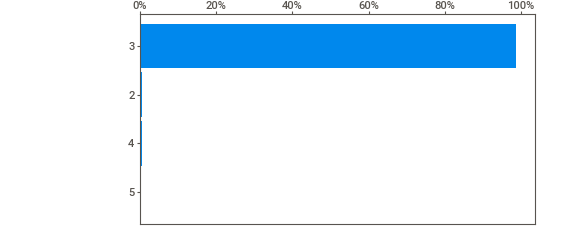
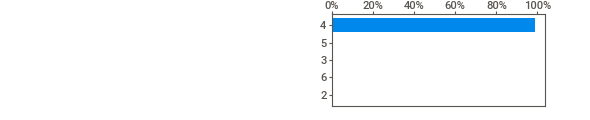
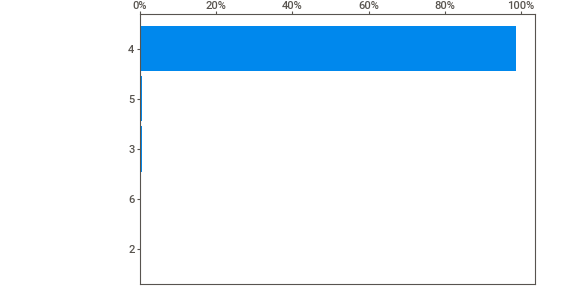
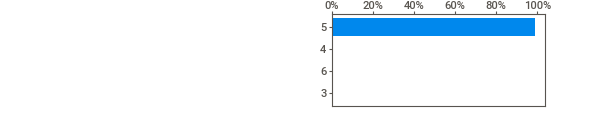
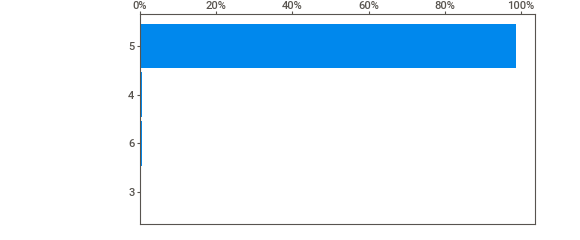
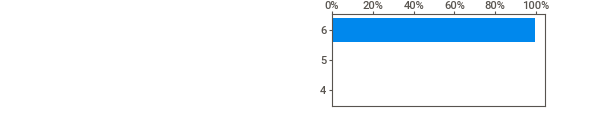
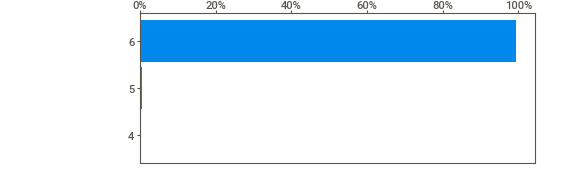
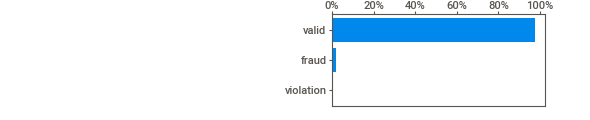
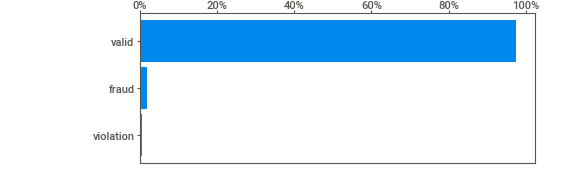
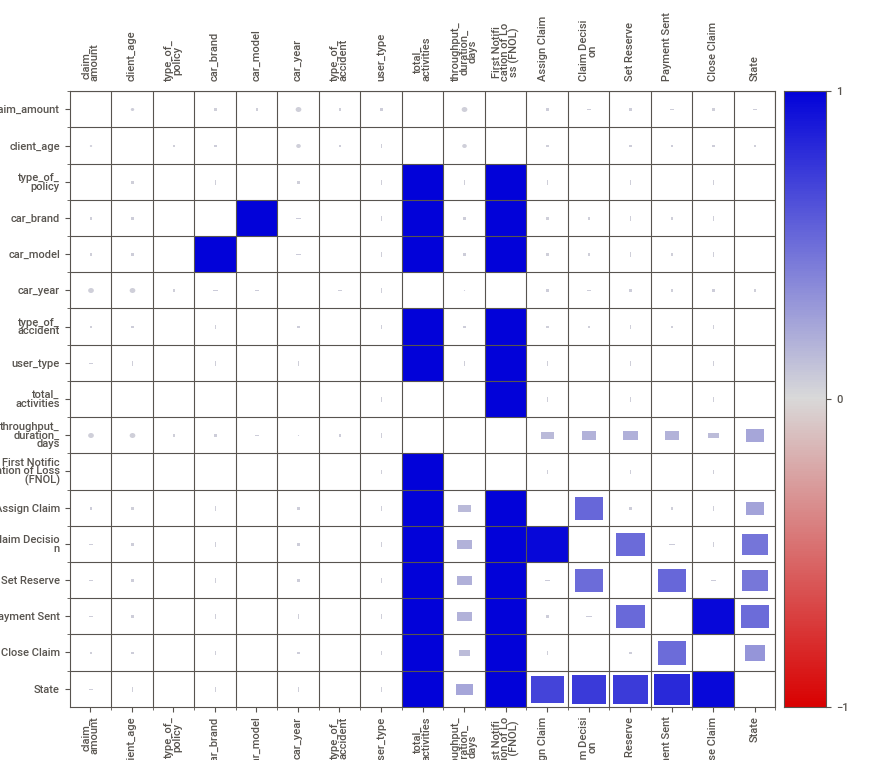
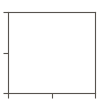

In [25]:
# SweetViz
import sweetviz as sv
report = sv.analyze(df)
report.show_notebook()

In [26]:
import dtale

# method 2 : 
# Start dtale and pass your DataFrame
d = dtale.show(df)
# Open the dtale dashboard in your default web browser
d.open_browser()

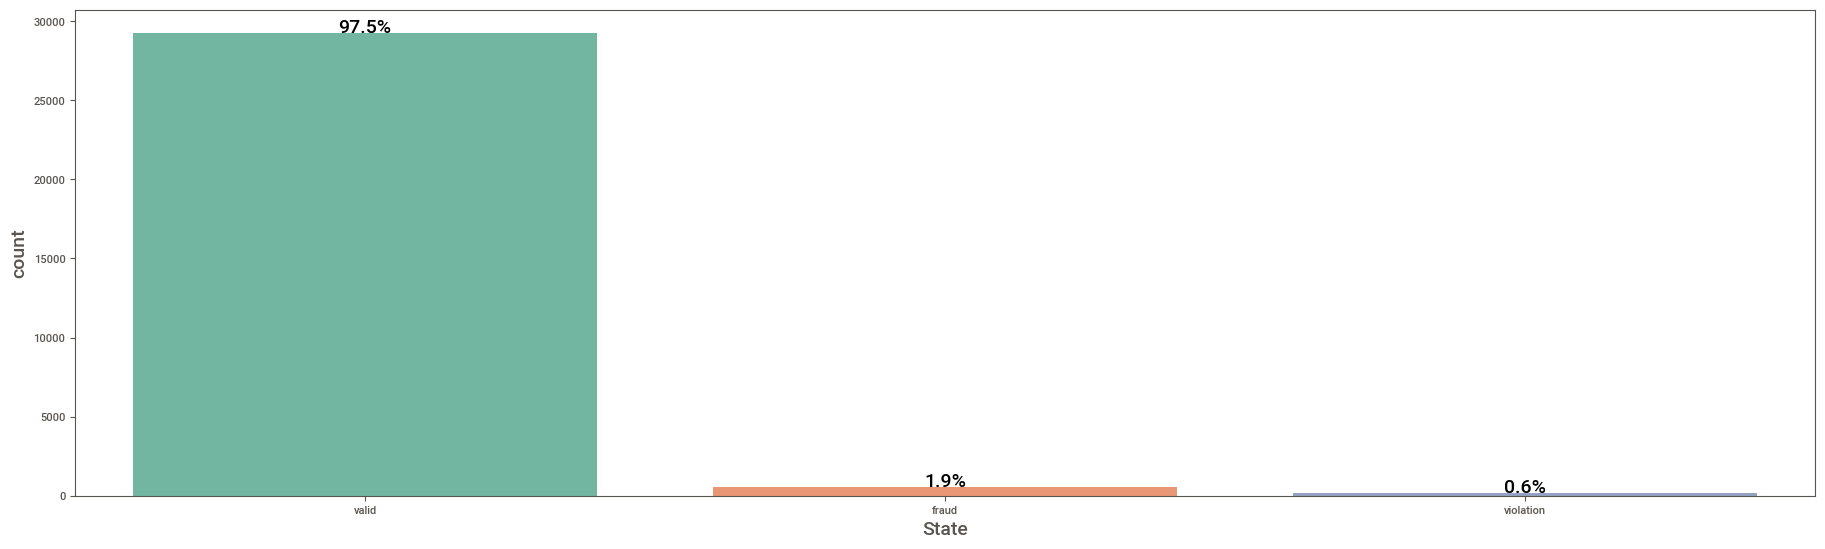

In [43]:
# Create the countplot
fig, axis = plt.subplots(1, 1, figsize=(20, 6))
sns.countplot(data=df, x='State', ax=axis, palette='Set2')

# Add percentages for each bar
total = len(df['State'])
for p in axis.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.5
    axis.annotate(percentage, (x, y), ha='center')

plt.show()

- unbalance data :
    - majority class : valid
    - minority classes : fraud - unknow - violation

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   case_id                            30000 non-null  object 
 1   client                             30000 non-null  object 
 2   agent                              30000 non-null  object 
 3   adjuster                           30000 non-null  object 
 4   claim_amount                       30000 non-null  float64
 5   client_age                         30000 non-null  int64  
 6   type_of_policy                     30000 non-null  object 
 7   car_brand                          30000 non-null  object 
 8   car_model                          30000 non-null  object 
 9   car_year                           30000 non-null  int64  
 10  type_of_accident                   30000 non-null  object 
 11  user_type                          30000 non-null  obj

In [41]:
categoricals = list(df.select_dtypes(include='object'))
numericals = list(df.select_dtypes(include=['int64', 'float64']))

In [47]:
print(numericals)
print(categoricals)

['claim_amount', 'client_age', 'car_year', 'total_activities', 'throughput_duration_days']
['client', 'agent', 'adjuster', 'type_of_policy', 'car_brand', 'car_model', 'type_of_accident', 'user_type', 'State']


In [46]:
del(numericals[5:])

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, 

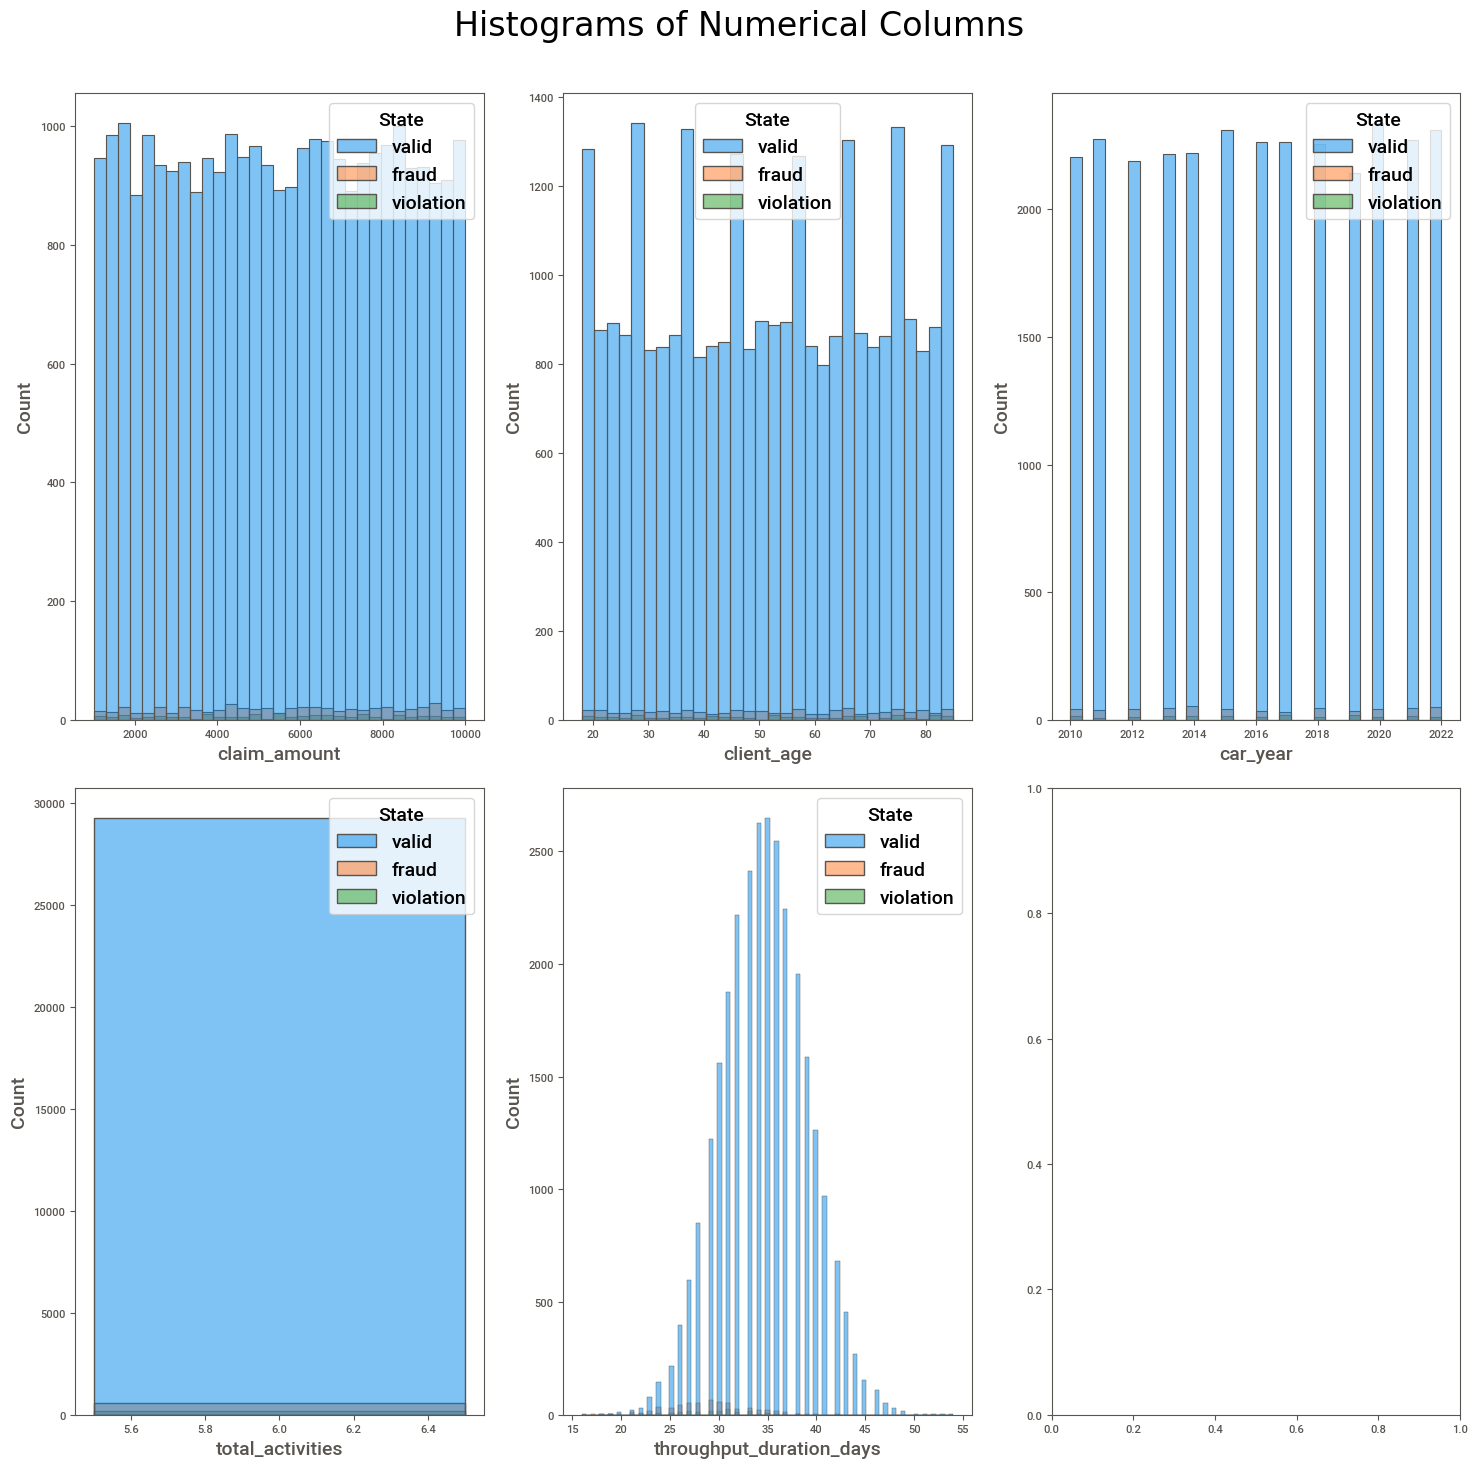

In [48]:
norow = len(numericals) // 3 + 1
fig, ax = plt.subplots(norow, 3, figsize=(15, 15))
plt.suptitle('Histograms of Numerical Columns\n', horizontalalignment="center", fontstyle="normal", fontsize=24, fontfamily="sans-serif")

for i, d in enumerate(numericals):
    if i < 3:
        chart = sns.histplot(x=df.loc[:, d], data=df, ax=ax[0, i], hue='State')
    else:
        chart = sns.histplot(x=df.loc[:, d], data=df, ax=ax[i // 3, i % 3], hue='State')

plt.tight_layout()
plt.show()

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

def pltCountplot(data, cats, target='', hue=''):
    num_cols = 2
    num_rows = 3
    fig, axis = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))  # Adjust figsize based on the number of rows
    index = 0
    for i in range(num_rows):
        for j in range(num_cols):
            if index < len(cats):
                ax = axis[i][j]
                # Get the sorted order of categories
                sorted_cats = data[cats[index]].value_counts().index
                # if target empty do not include else include
                if not target:
                    if not hue:
                        sns.countplot(data=data, x=cats[index], ax=ax, palette='Set2', hue=cats[index], order=sorted_cats)
                    else:
                        sns.countplot(data=data, x=cats[index], ax=ax, palette='Set2', hue=hue, order=sorted_cats)
                else:
                    if not hue:
                        sns.countplot(data=data, x=cats[index], ax=ax, palette='Set2', hue=target, order=sorted_cats) 
                    else:
                        sns.countplot(data=data, x=cats[index], ax=ax, palette='Set2', hue=hue, order=sorted_cats)
                
                ax.legend(
                    title='Legend',
                    loc='upper right',
                )
                
                if cats[index] in ['type_of_policy', 'car_brand', 'car_model', 'type_of_accident', 'user_type']:
                    for item in ax.get_xticklabels():
                        item.set_rotation(30)
                
                for p in ax.patches:
                    height = p.get_height()
                    ax.text(
                        p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(data)*100),
                        ha="center"
                    ) 
                index += 1

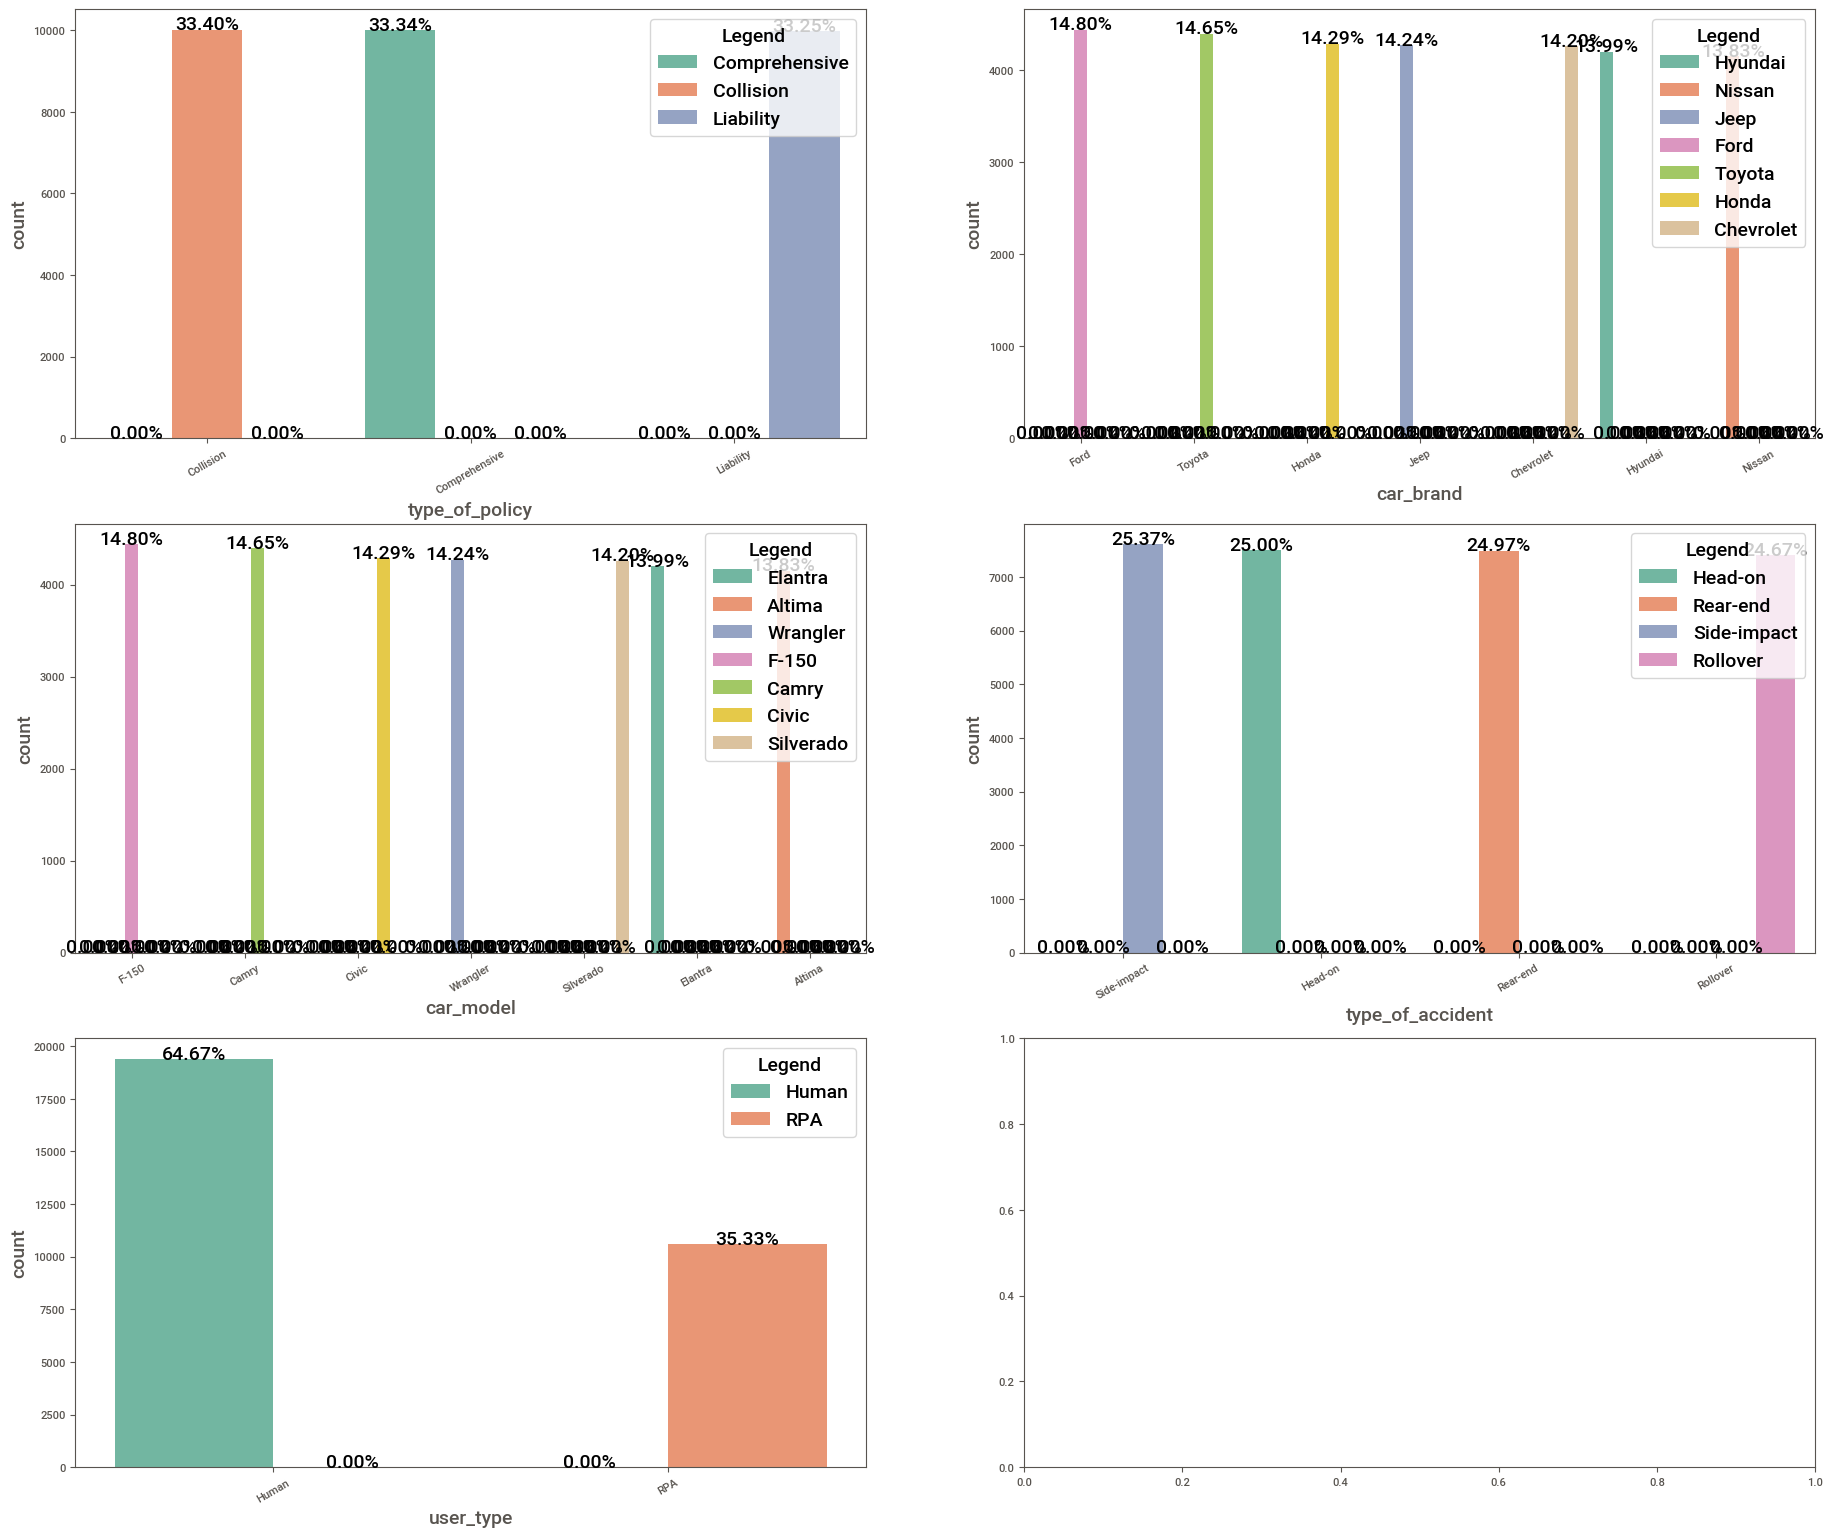

In [65]:
pltCountplot(df, categoricals[3:8])

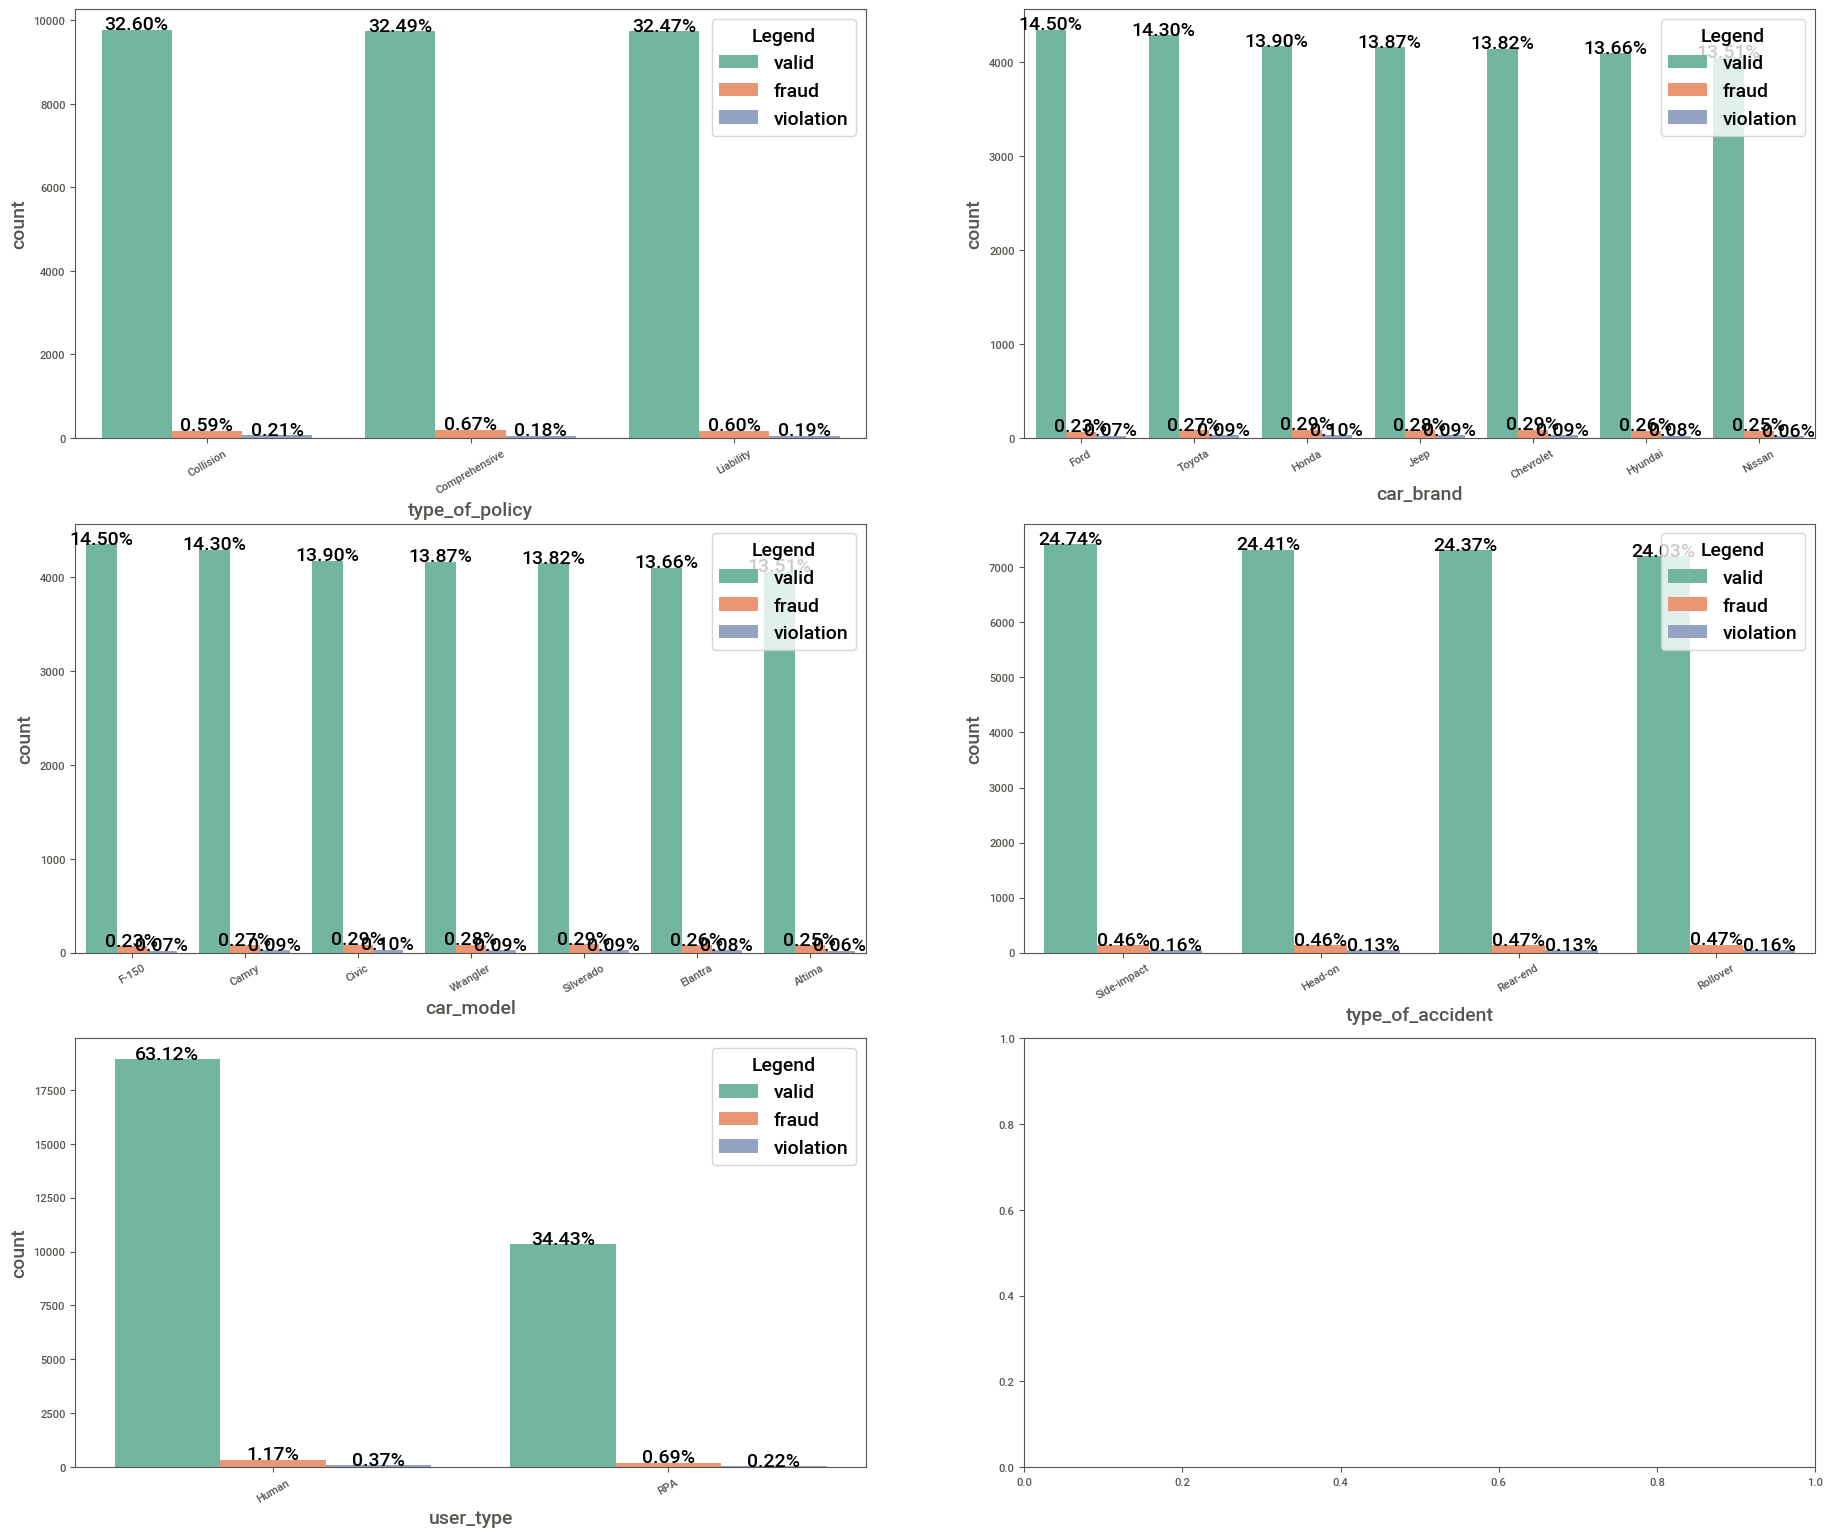

In [66]:
pltCountplot(df, categoricals[3:8], 'State')

### Umbalance classes

In [68]:
dfv = df.loc[df['State'] != 'valid',:]
dfv

,client,agent,adjuster,claim_amount,client_age,type_of_policy,car_brand,car_model,car_year,type_of_accident,user_type,total_activities,throughput_duration_days,First Notification of Loss (FNOL),Assign Claim,Claim Decision,Set Reserve,Payment Sent,Close Claim,State
4,Dawn Gentry,Taylor Rose,Diane Holmes,7181.00,61,Collision,Hyundai,Elantra,2017,Rollover,Human,6,25,1,2,4,3,5,6,fraud
88,Jesse Anderson,Theresa Moore,Audrey Kelly,9239.01,50,Collision,Chevrolet,Silverado,2016,Rollover,Human,6,25,1,2,3,5,4,6,fraud
135,Eric Thomas,Anthony Compton,Ann Reyes,1022.71,47,Collision,Ford,F-150,2014,Rollover,Human,6,19,1,2,3,5,4,6,fraud
138,Amanda Powell,John Hughes,Angela Stevens,6257.96,82,Liability,Toyota,Camry,2011,Rollover,RPA,6,27,1,2,3,4,6,5,violation
157,Melanie Morris,Arthur Ray DDS,Ian Haney,9376.88,81,Collision,Honda,Civic,2010,Head-on,RPA,6,30,1,2,3,4,6,5,violation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29752,Catherine Rios,Austin Ramsey,Mr. James Lee,3621.79,26,Comprehensive,Hyundai,Elantra,2011,Rear-end,Human,6,27,1,2,3,5,4,6,fraud
29768,Kimberly Vega,Douglas Bennett,Carla Stevens,1878.03,37,Comprehensive,Hyundai,Elantra,2012,Head-on,RPA,6,25,1,2,4,3,5,6,fraud
29853,Ivan Collins,Rachel Blackwell,Pamela Jones,2048.86,67,Liability,Chevrolet,Silverado,2018,Rollover,Human,6,30,1,2,4,3,5,6,fraud
29951,Jaime Murphy,James Reynolds,Richard Colon,5035.55,53,Liability,Chevrolet,Silverado,2021,Side-impact,RPA,6,24,1,2,3,4,6,5,violation


In [69]:
dfv.nunique()

client                               725
agent                                733
adjuster                             735
claim_amount                         735
client_age                            68
type_of_policy                         3
car_brand                              7
car_model                              7
car_year                              13
type_of_accident                       4
user_type                              2
total_activities                       1
throughput_duration_days              26
First Notification of Loss (FNOL)      1
Assign Claim                           3
Claim Decision                         4
Set Reserve                            5
Payment Sent                           4
Close Claim                            3
State                                  2
dtype: int64

In [81]:
cols = (dfv.columns).to_list()
for col in cols: 
    print(f"\n{dfv[col].value_counts()}")


client
James Cooper         3
Joseph Johnson       2
Sarah Smith          2
Kimberly Anderson    2
Lisa Young           2
                    ..
Heather Wallace      1
Barry Parker         1
Jason Thompson       1
Jose Bell            1
Molly Hurst DVM      1
Name: count, Length: 725, dtype: int64

agent
Christopher Hall    2
Sarah Hansen        2
Taylor Rose         1
William Butler      1
Nancy Evans         1
                   ..
Ms. Lisa Fisher     1
Courtney Kane       1
Kristin Sanchez     1
Joseph Hughes       1
William Anderson    1
Name: count, Length: 733, dtype: int64

adjuster
Diane Holmes          1
David Martinez        1
Amy Hall              1
Wayne Roberts         1
Tommy Andersen        1
                     ..
Samantha Johnson      1
Carolyn Hughes        1
Elizabeth Chambers    1
Christian Peterson    1
Stephanie Roberson    1
Name: count, Length: 735, dtype: int64

claim_amount
7181.00    1
8325.90    1
8407.98    1
5983.01    1
8531.04    1
          ..
7628.29

## Data processing

### Backup

In [87]:
import copy
df1 = copy.deepcopy(df)

In [106]:
# df = copy.deepcopy(df1)

In [110]:
df['State'].value_counts()

State
0    29265
1      559
2      176
Name: count, dtype: int64

### Encoding

In [84]:
df = df.drop(columns=['client', 'agent', 'adjuster'])

In [91]:
df.nunique()

claim_amount                         29519
client_age                              68
type_of_policy                           3
car_brand                                7
car_model                                7
car_year                                13
type_of_accident                         4
user_type                                2
total_activities                         1
throughput_duration_days                39
First Notification of Loss (FNOL)        1
Assign Claim                             3
Claim Decision                           4
Set Reserve                              5
Payment Sent                             4
Close Claim                              3
State                                    3
dtype: int64

In [92]:
# lable/nominal encoding (0,....,N) random
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

label_encoder = LabelEncoder()
df['type_of_policy'] = label_encoder.fit_transform(df['type_of_policy'])
df['car_brand'] = label_encoder.fit_transform(df['car_brand'])
df['car_model'] = label_encoder.fit_transform(df['car_model'])
df['type_of_accident'] = label_encoder.fit_transform(df['type_of_accident'])
df['user_type'] = label_encoder.fit_transform(df['user_type'])

# Convert 'claim_amount' to integer if needed
df['claim_amount'] = df['claim_amount'].astype(int)

# Ordinal Encoding for ordered categorical data
state_dict = {'valid': 0, 'fraud': 1, 'violation': 2}
ordinal_encoder = ce.OrdinalEncoder(mapping=[{'col': 'State', 'mapping': state_dict}])
df['State'] = ordinal_encoder.fit_transform(df['State'])

df.head()

,claim_amount,client_age,type_of_policy,car_brand,car_model,car_year,type_of_accident,user_type,total_activities,throughput_duration_days,First Notification of Loss (FNOL),Assign Claim,Claim Decision,Set Reserve,Payment Sent,Close Claim,State
0,9266,60,1,3,3,2021,0,0,6,31,1,2,3,4,5,6,0
1,4636,21,1,5,0,2012,0,0,6,30,1,2,3,4,5,6,0
2,4897,44,1,3,3,2011,1,1,6,34,1,2,3,4,5,6,0
3,9596,81,0,4,6,2017,3,1,6,36,1,2,3,4,5,6,0
4,7181,61,0,3,3,2017,2,0,6,25,1,2,4,3,5,6,1


### Checking

In [96]:
df['State'].value_counts()

State
0    29265
1      559
2      176
Name: count, dtype: int64

- 0 : valid
- 1 : fraud
- 2 : violation 

In [97]:
df1 = copy.deepcopy(df)

### Balancing data

In [111]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler

# Assuming df is your existing DataFrame
# Features and Target
X = df.drop('State', axis=1)
y = df['State']

# Check initial class distribution
print("Original class distribution:")
print(y.value_counts())

# Step 1: Over-sample minority classes using SMOTE
smote = SMOTE(sampling_strategy={1: 8000, 2: 8000}, random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print("\nAfter SMOTE:")
print(y_smote.value_counts())

# Optional Step 2: Use SMOTETomek to clean and further balance
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)
X_balanced, y_balanced = smote_tomek.fit_resample(X_smote, y_smote)
print("\nAfter SMOTETomek:")
print(y_balanced.value_counts())

# Optional Step 3: Further Under-sample the majority class to achieve 30-40% balance
rus = RandomUnderSampler(sampling_strategy={0: 12000, 1: 8000, 2: 8000}, random_state=42)
X_final, y_final = rus.fit_resample(X_balanced, y_balanced)
print("\nFinal class distribution after Random Under-Sampling:")
print(y_final.value_counts())

# Combine X_final and y_final back into a DataFrame
df_balanced = pd.concat([X_final, y_final], axis=1)

# Save the balanced DataFrame to CSV
df_balanced.to_csv('dataset/Insurance_claims_ML_blanced.csv', index=False)

Original class distribution:
State
0    29265
1      559
2      176
Name: count, dtype: int64

After SMOTE:
State
0    29265
1     8000
2     8000
Name: count, dtype: int64

After SMOTETomek:
State
2    29201
1    29194
0    29134
Name: count, dtype: int64

Final class distribution after Random Under-Sampling:
State
0    12000
1     8000
2     8000
Name: count, dtype: int64


In [112]:
df_balanced.shape

(28000, 17)

## Model

In [21]:
import pandas as pd 
df = pd.read_csv('dataset/Insurance_claims_ML_blanced.csv')
df.head()

,claim_amount,client_age,type_of_policy,car_brand,car_model,car_year,type_of_accident,user_type,total_activities,throughput_duration_days,First Notification of Loss (FNOL),Assign Claim,Claim Decision,Set Reserve,Payment Sent,Close Claim,State
0,3092,83,2,2,2,2012,2,0,6,28,1,2,3,4,5,6,0
1,3792,65,0,2,2,2018,0,0,6,34,1,2,3,4,5,6,0
2,2313,51,2,3,3,2014,0,1,6,39,1,2,3,4,5,6,0
3,7700,85,0,3,3,2017,0,1,6,31,1,2,3,4,5,6,0
4,6927,85,0,4,6,2016,3,0,6,30,1,2,3,4,5,6,0


### Tpot evaluation

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split features and target
X = df.drop('State', axis=1)
y = df['State']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize TPOT
tpot = TPOTClassifier(
    generations=5,  # Number of iterations to run
    population_size=50,  # Number of pipelines to evaluate in each generation
    verbosity=2,  # Verbosity level
    random_state=42,  # Ensure reproducibility
    n_jobs=-1  # Use all available CPU cores
)

# Fit TPOT on the training data
tpot.fit(X_train, y_train)

# Print the score of the best pipeline on the test set
print("\nBest pipeline test accuracy:", tpot.score(X_test, y_test))

# Export the best pipeline to a Python script
tpot.export('tpot_best_pipeline.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9999553571428571

Generation 2 - Current best internal CV score: 0.9999553571428571

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Best pipeline: XGBClassifier(input_matrix, learning_rate=1.0, max_depth=4, min_child_weight=5, n_estimators=100, n_jobs=1, subsample=0.6000000000000001, verbosity=0)

Best pipeline test accuracy: 1.0


c:\Users\lenovo\Desktop\Jupyter_Workspace\PFA\tpot_best_pipeline.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)


FileNotFoundError: [Errno 2] No such file or directory: 'PATH/TO/DATA/FILE'

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tpot_best_pipeline import exported_pipeline as tpot_pipeline  # Updated import statement

# Load data
tpot_data = pd.read_csv('dataset/Insurance_claims_ML_blanced.csv', sep=',', dtype=np.float64)

# Split features and target
X = tpot_data.drop('State', axis=1)
y = tpot_data['State']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train the best model
tpot_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = tpot_pipeline.predict(X_test)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2400
         1.0       1.00      1.00      1.00      1600
         2.0       1.00      1.00      1.00      1600

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


Confusion Matrix:
[[2400    0    0]
 [   0 1600    0]
 [   0    0 1600]]


In [16]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tpot_pipeline, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

Cross-validation scores: [1.         1.         0.99982143 1.         1.        ]
Mean cross-validation score: 0.9999642857142856


In [17]:
print("Class distribution in training set:")
print(y_train.value_counts())
print("Class distribution in test set:")
print(y_test.value_counts())


Class distribution in training set:
State
0.0    9600
2.0    6400
1.0    6400
Name: count, dtype: int64
Class distribution in test set:
State
0.0    2400
2.0    1600
1.0    1600
Name: count, dtype: int64


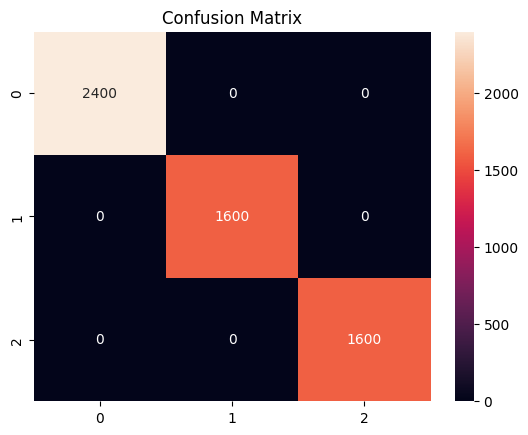

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


### Classification models evaluation

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Load data
df = pd.read_csv('dataset/Insurance_claims_ML_blanced.csv', sep=',')

# Split features and target
X = df.drop('State', axis=1)
y = df['State']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier()
}

# Initialize a dictionary to store results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Extract metrics for each class
    accuracy = (conf_matrix.diagonal().sum() / conf_matrix.sum())
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    
    # Store results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1_score)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print("\nPerformance Table:")
results_df

Training and evaluating Logistic Regression...


c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training and evaluating Support Vector Classifier...


c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Training and evaluating Decision Tree Classifier...
Training and evaluating Random Forest Classifier...
Training and evaluating K-Nearest Neighbors...
Training and evaluating Naive Bayes...
Training and evaluating XGBoost...

Performance Table:


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.775536,0.780581,0.773056,0.774775
1,Support Vector Classifier,0.428571,0.142857,0.333333,0.200000
2,Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000
3,Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
4,K-Nearest Neighbors,0.819643,0.821463,0.840972,0.821679
5,Naive Bayes,0.996250,0.995654,0.995625,0.995625
6,XGBoost,1.000000,1.000000,1.000000,1.000000


- fitting problems for : Decision tree - Random forest - Naive bayes - XGBoost
- Optimum can be the KNN models

### KNN Classifier - Tuning

Best parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best cross-validation score: 0.8890
Accuracy of best model: 0.9048
Confusion Matrix of best model:
[[1916  267  217]
 [  24 1568    8]
 [   8    9 1583]]
Classification Report of best model:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      2400
           1       0.85      0.98      0.91      1600
           2       0.88      0.99      0.93      1600

    accuracy                           0.90      5600
   macro avg       0.90      0.92      0.91      5600
weighted avg       0.91      0.90      0.90      5600



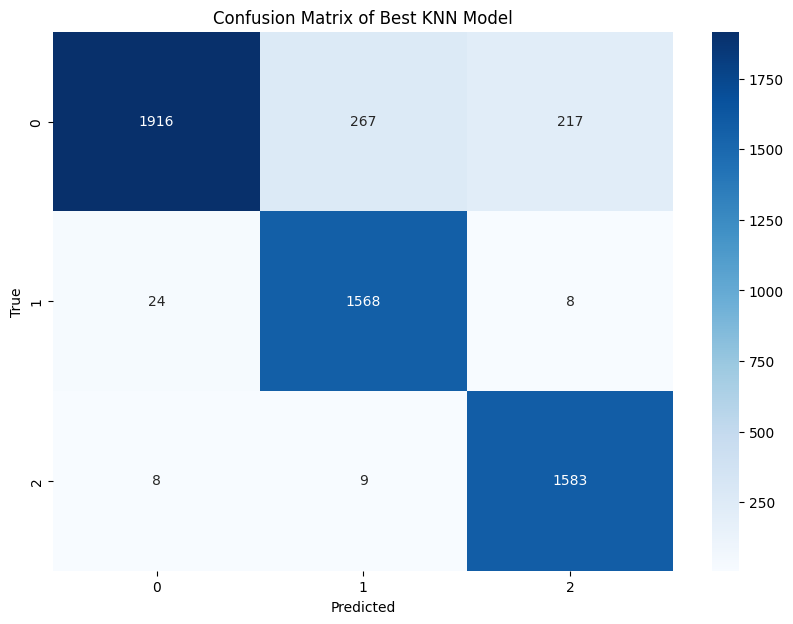

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('dataset/Insurance_claims_ML_blanced.csv', sep=',')

# Split features and target
X = df.drop('State', axis=1)
y = df['State']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': list(range(3, 22, 2)),  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'p': [1, 2]  # Power parameter for the Minkowski distance
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Use the best model
best_knn = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_knn.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

# Print results
print(f"Accuracy of best model: {accuracy_best:.4f}")
print("Confusion Matrix of best model:")
print(conf_matrix_best)
print("Classification Report of best model:")
print(class_report_best)

# Plot Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', 
            xticklabels=df['State'].unique(), yticklabels=df['State'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Best KNN Model')
plt.show()

### Prediction on new data

In [ ]:
# # Example: Predict on new data
# new_data = pd.DataFrame({
    
# })

# # Make predictions
# predictions = knn.predict(new_data)
# print("Predictions:", predictions)